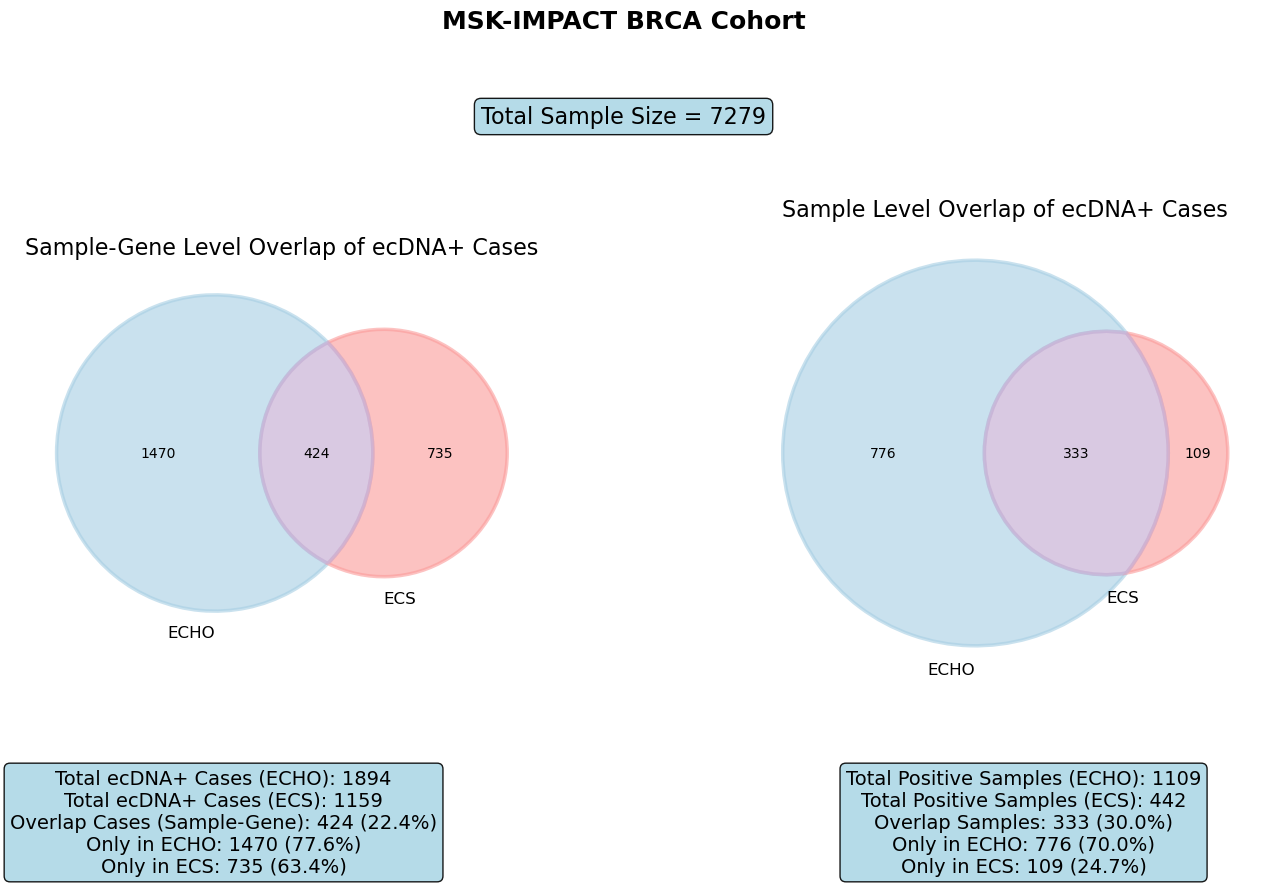

In [32]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1 = "merged.ECHO_results.csv"  # Old version file name
file2 = "merged_ecDNA_results_filtered_p_ecDNA.tsv"  # New version file name

# Define total sample size
total_sample_size = 7279

# Construct full paths
file1_path = os.path.join(directory, file1)
file2_path = os.path.join(directory, file2)

# Load data
old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene and sample-only sets
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

old_ecDNA_set_sample = set(old_ecDNA['sample_id'].unique())
new_ecDNA_set_sample = set(new_ecDNA['sample_id'].unique())

# Calculate overlaps for both sample-gene level and sample level
only_old_gene = len(old_ecDNA_set_gene - new_ecDNA_set_gene)
only_new_gene = len(new_ecDNA_set_gene - old_ecDNA_set_gene)
overlap_gene = len(old_ecDNA_set_gene & new_ecDNA_set_gene)

only_old_sample = len(old_ecDNA_set_sample - new_ecDNA_set_sample)
only_new_sample = len(new_ecDNA_set_sample - old_ecDNA_set_sample)
overlap_sample = len(old_ecDNA_set_sample & new_ecDNA_set_sample)

# Count totals and percentages
total_old_gene = len(old_ecDNA_set_gene)
total_new_gene = len(new_ecDNA_set_gene)
total_old_sample = len(old_ecDNA_set_sample)
total_new_sample = len(new_ecDNA_set_sample)

percent_only_old_gene = (only_old_gene / total_old_gene) * 100
percent_only_new_gene = (only_new_gene / total_new_gene) * 100
percent_overlap_gene = (overlap_gene / total_old_gene) * 100

percent_only_old_sample = (only_old_sample / total_old_sample) * 100
percent_only_new_sample = (only_new_sample / total_new_sample) * 100
percent_overlap_sample = (overlap_sample / total_old_sample) * 100

# Step 6: Plot Venn diagrams with title, separate text boxes, and save in high resolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Increase space between subplots and titles

# Add main title
plt.suptitle("MSK-IMPACT BRCA Cohort", fontsize=18, fontweight="bold", y=1.05)

# Top center box with total sample size
top_text = f"Total Sample Size = {total_sample_size}"
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9)
plt.gcf().text(0.5, 0.93, top_text, ha='center', va='top', fontsize=16, bbox=props)

# Left Plot: Sample-Gene Level Venn Diagram
venn_gene = venn2(ax=ax1, subsets=(only_old_gene, only_new_gene, overlap_gene), set_labels=('ECHO', 'ECS'))
venn_gene.get_patch_by_id('10').set_color('#a6cee3')
venn_gene.get_patch_by_id('01').set_color('#fb9a99')
venn_gene.get_patch_by_id('11').set_color('#cab2d6')
venn_gene.get_patch_by_id('10').set_alpha(0.6)
venn_gene.get_patch_by_id('01').set_alpha(0.6)
venn_gene.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample-gene level Venn
for patch in ['10', '01', '11']:
    venn_gene.get_patch_by_id(patch).set_linewidth(2.5)

# Title for left Venn diagram
ax1.set_title("Sample-Gene Level Overlap of ecDNA+ Cases", fontsize=16, fontweight="normal")

# Text box for sample-gene level with larger font size
textstr_gene = (f"Total ecDNA+ Cases (ECHO): {total_old_gene}\n"
                f"Total ecDNA+ Cases (ECS): {total_new_gene}\n"
                f"Overlap Cases (Sample-Gene): {overlap_gene} ({percent_overlap_gene:.1f}%)\n"
                f"Only in ECHO: {only_old_gene} ({percent_only_old_gene:.1f}%)\n"
                f"Only in ECS: {only_new_gene} ({percent_only_new_gene:.1f}%)")
plt.gcf().text(0.25, 0.1, textstr_gene, ha='center', va='top', fontsize=14, bbox=props)

# Right Plot: Sample Level Venn Diagram
venn_sample = venn2(ax=ax2, subsets=(only_old_sample, only_new_sample, overlap_sample), set_labels=('ECHO', 'ECS'))
venn_sample.get_patch_by_id('10').set_color('#a6cee3')
venn_sample.get_patch_by_id('01').set_color('#fb9a99')
venn_sample.get_patch_by_id('11').set_color('#cab2d6')
venn_sample.get_patch_by_id('10').set_alpha(0.6)
venn_sample.get_patch_by_id('01').set_alpha(0.6)
venn_sample.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample level Venn
for patch in ['10', '01', '11']:
    venn_sample.get_patch_by_id(patch).set_linewidth(2.5)

# Title for right Venn diagram
ax2.set_title("Sample Level Overlap of ecDNA+ Cases", fontsize=16, fontweight="normal")

# Text box for sample level with larger font size
textstr_sample = (f"Total Positive Samples (ECHO): {total_old_sample}\n"
                  f"Total Positive Samples (ECS): {total_new_sample}\n"
                  f"Overlap Samples: {overlap_sample} ({percent_overlap_sample:.1f}%)\n"
                  f"Only in ECHO: {only_old_sample} ({percent_only_old_sample:.1f}%)\n"
                  f"Only in ECS: {only_new_sample} ({percent_only_new_sample:.1f}%)")
plt.gcf().text(0.75, 0.1, textstr_sample, ha='center', va='top', fontsize=14, bbox=props)

# Adjust layout and save the figure
output_path = os.path.join(directory, "venn_diagram_comparison_all_genes.png")
plt.savefig(output_path, format="png", dpi=600, bbox_inches="tight")

plt.show()


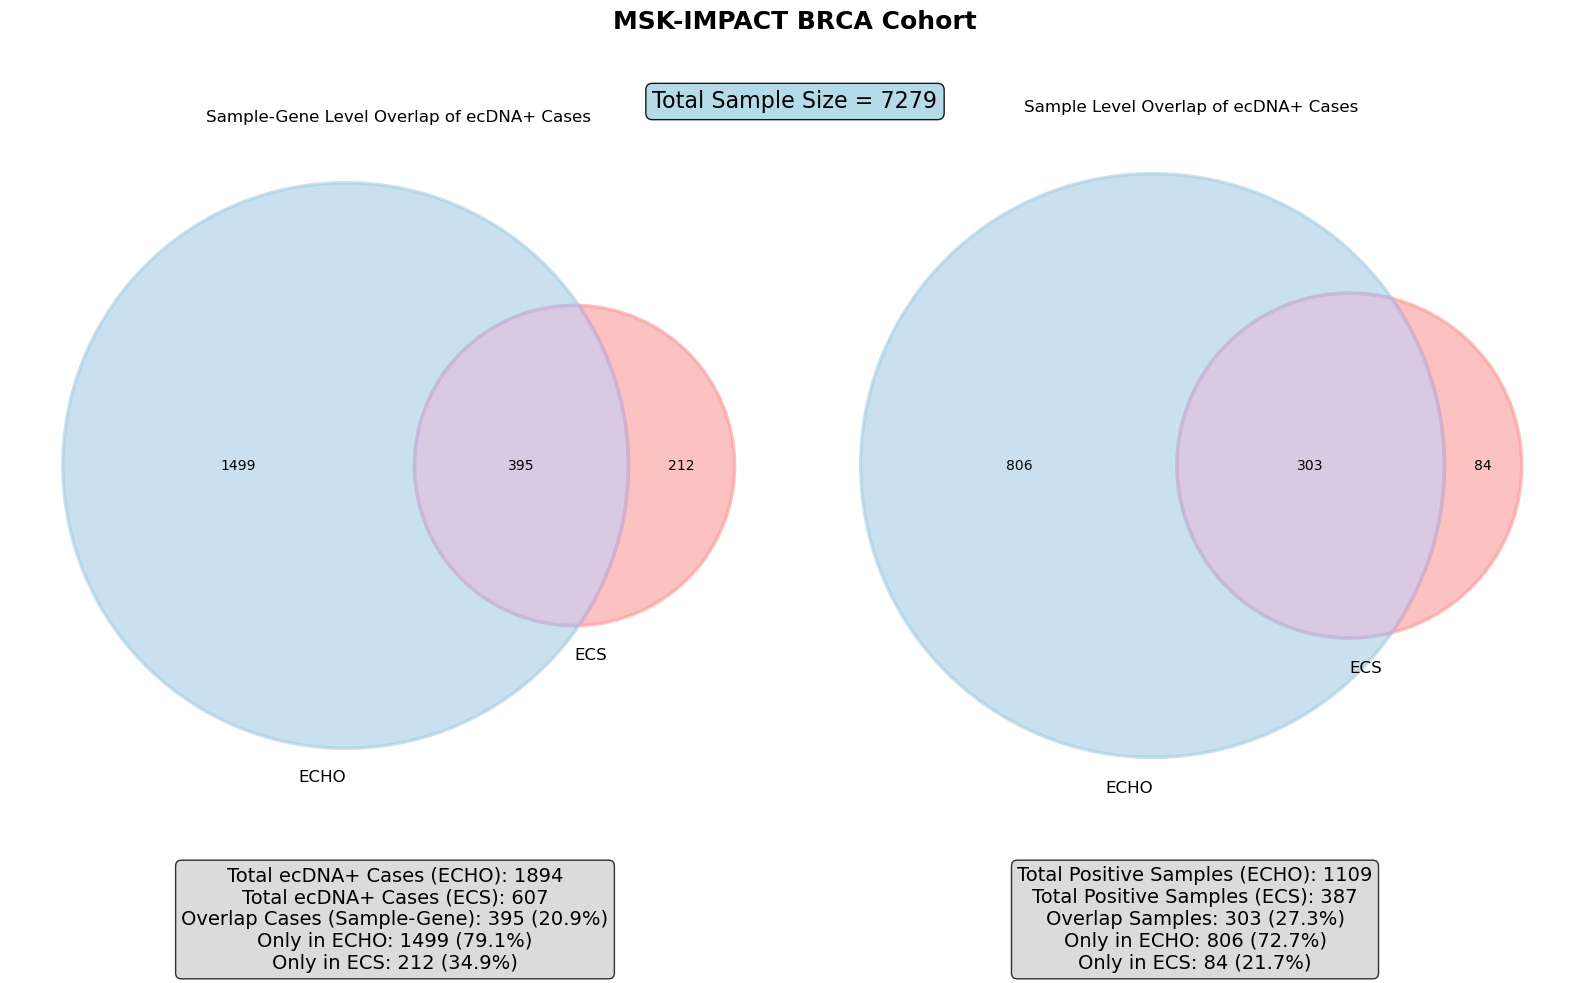

In [26]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1 = "merged.ECHO_results.csv"  # Old version file name
file2 = "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv"  # New version file name

# Define total sample size
total_sample_size = 7279

# Construct full paths
file1_path = os.path.join(directory, file1)
file2_path = os.path.join(directory, file2)

# Load data
old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene and sample-only sets
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

old_ecDNA_set_sample = set(old_ecDNA['sample_id'].unique())
new_ecDNA_set_sample = set(new_ecDNA['sample_id'].unique())

# Calculate overlaps for both sample-gene level and sample level
only_old_gene = len(old_ecDNA_set_gene - new_ecDNA_set_gene)
only_new_gene = len(new_ecDNA_set_gene - old_ecDNA_set_gene)
overlap_gene = len(old_ecDNA_set_gene & new_ecDNA_set_gene)

only_old_sample = len(old_ecDNA_set_sample - new_ecDNA_set_sample)
only_new_sample = len(new_ecDNA_set_sample - old_ecDNA_set_sample)
overlap_sample = len(old_ecDNA_set_sample & new_ecDNA_set_sample)

# Count totals and percentages
total_old_gene = len(old_ecDNA_set_gene)
total_new_gene = len(new_ecDNA_set_gene)
total_old_sample = len(old_ecDNA_set_sample)
total_new_sample = len(new_ecDNA_set_sample)

percent_only_old_gene = (only_old_gene / total_old_gene) * 100
percent_only_new_gene = (only_new_gene / total_new_gene) * 100
percent_overlap_gene = (overlap_gene / total_old_gene) * 100

percent_only_old_sample = (only_old_sample / total_old_sample) * 100
percent_only_new_sample = (only_new_sample / total_new_sample) * 100
percent_overlap_sample = (overlap_sample / total_old_sample) * 100

# Step 6: Plot Venn diagrams with title, separate text boxes, and save in high resolution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Add main title
plt.suptitle("MSK-IMPACT BRCA Cohort", fontsize=18, fontweight="bold", y=1.02)

# Top center box with total sample size
top_text = f"Total Sample Size = {total_sample_size}"
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9)
plt.gcf().text(0.5, 0.92, top_text, ha='center', va='top', fontsize=16, bbox=props)

# Left Plot: Sample-Gene Level Venn Diagram
plt.sca(ax1)
venn_gene = venn2(subsets=(only_old_gene, only_new_gene, overlap_gene), set_labels=('ECHO', 'ECS'))
venn_gene.get_patch_by_id('10').set_color('#a6cee3')
venn_gene.get_patch_by_id('01').set_color('#fb9a99')
venn_gene.get_patch_by_id('11').set_color('#cab2d6')
venn_gene.get_patch_by_id('10').set_alpha(0.6)
venn_gene.get_patch_by_id('01').set_alpha(0.6)
venn_gene.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample-gene level Venn
for patch in ['10', '01', '11']:
    venn_gene.get_patch_by_id(patch).set_linewidth(2.5)  # Thicker boundary

plt.title("Sample-Gene Level Overlap of ecDNA+ Cases")

# Text box for sample-gene level with larger font size
textstr_gene = (f"Total ecDNA+ Cases (ECHO): {total_old_gene}\n"
                f"Total ecDNA+ Cases (ECS): {total_new_gene}\n"
                f"Overlap Cases (Sample-Gene): {overlap_gene} ({percent_overlap_gene:.1f}%)\n"
                f"Only in ECHO: {only_old_gene} ({percent_only_old_gene:.1f}%)\n"
                f"Only in ECS: {only_new_gene} ({percent_only_new_gene:.1f}%)")
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.8)
plt.gcf().text(0.25, -0.05, textstr_gene, ha='center', va='top', fontsize=14, bbox=props)  # Lowered y and increased font size

# Right Plot: Sample Level Venn Diagram
plt.sca(ax2)
venn_sample = venn2(subsets=(only_old_sample, only_new_sample, overlap_sample), set_labels=('ECHO', 'ECS'))
venn_sample.get_patch_by_id('10').set_color('#a6cee3')
venn_sample.get_patch_by_id('01').set_color('#fb9a99')
venn_sample.get_patch_by_id('11').set_color('#cab2d6')
venn_sample.get_patch_by_id('10').set_alpha(0.6)
venn_sample.get_patch_by_id('01').set_alpha(0.6)
venn_sample.get_patch_by_id('11').set_alpha(0.7)

# Make boundaries thicker for each circle in sample level Venn
for patch in ['10', '01', '11']:
    venn_sample.get_patch_by_id(patch).set_linewidth(2.5)  # Thicker boundary

plt.title("Sample Level Overlap of ecDNA+ Cases")

# Text box for sample level with larger font size
textstr_sample = (f"Total Positive Samples (ECHO): {total_old_sample}\n"
                  f"Total Positive Samples (ECS): {total_new_sample}\n"
                  f"Overlap Samples: {overlap_sample} ({percent_overlap_sample:.1f}%)\n"
                  f"Only in ECHO: {only_old_sample} ({percent_only_old_sample:.1f}%)\n"
                  f"Only in ECS: {only_new_sample} ({percent_only_new_sample:.1f}%)")
plt.gcf().text(0.75, -0.05, textstr_sample, ha='center', va='top', fontsize=14, bbox=props)  # Lowered y and increased font size

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for suptitle and top text box
output_path = os.path.join(directory, "venn_diagram_comparison.png")
plt.savefig(output_path, format="png", dpi=600, bbox_inches="tight")

plt.show()


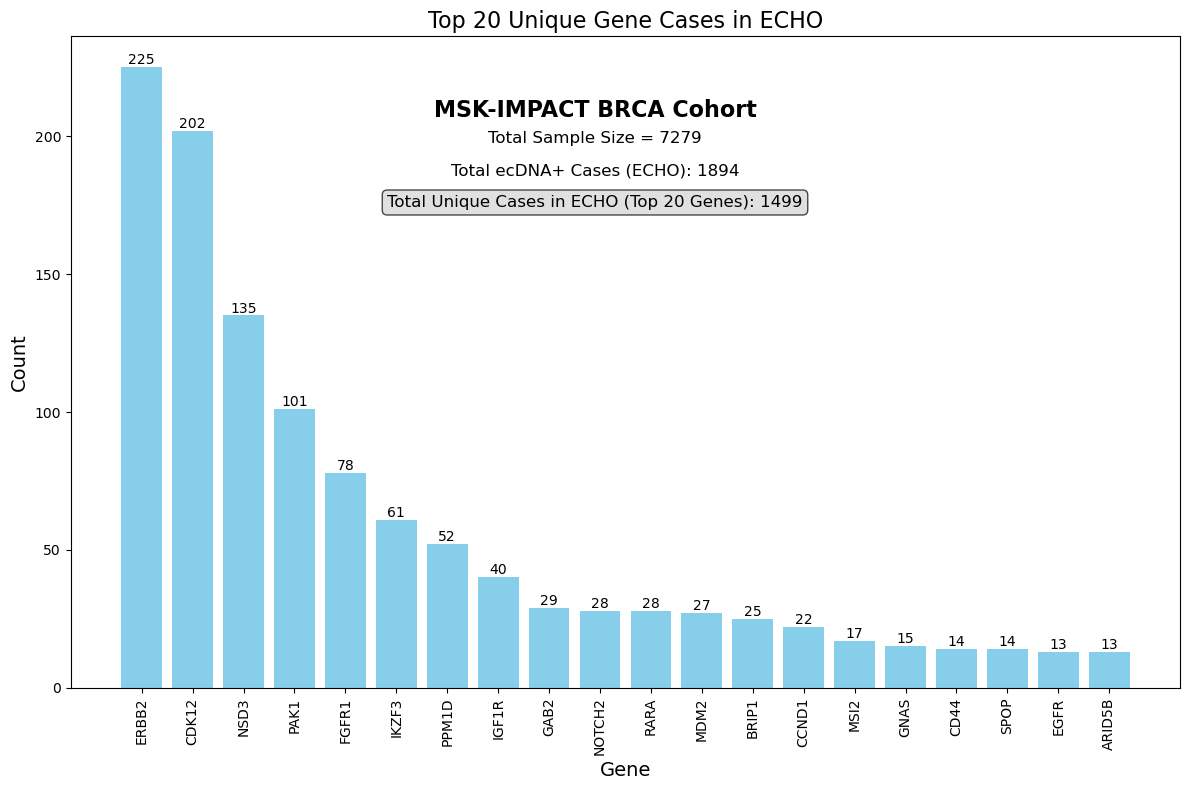

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene pairs for each dataset
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Identify unique cases to ECHO
unique_echo_cases = old_ecDNA[~old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1).isin(new_ecDNA_set_gene)]

# Count the unique cases by gene, showing only the top 20 genes
unique_echo_gene_counts = unique_echo_cases['gene'].value_counts().nlargest(20)

# Correct count of total ecDNA+ cases for ECHO (unique sample-gene pairs)
total_ecDNA_plus_cases_echo = old_ecDNA[['sample_id', 'gene']].drop_duplicates().shape[0]

# Create the bar plot for the top 20 genes
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(unique_echo_gene_counts.index, unique_echo_gene_counts.values, color='skyblue')

# Add count annotations on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Unique Gene Cases in ECHO', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Main text annotations for the plot
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total ecDNA+ Cases (ECHO): {total_ecDNA_plus_cases_echo}", ha='center', va='top', fontsize=12)

# Text box with total unique cases for ECHO (top 20 genes only)
total_unique_cases = unique_echo_cases[['sample_id', 'gene']].drop_duplicates().shape[0]
plt.figtext(0.5, 0.75, f'Total Unique Cases in ECHO (Top 20 Genes): {total_unique_cases}', ha='center', va='top', fontsize=12,
            bbox=dict(facecolor='lightgrey', alpha=0.7, boxstyle='round'))

# Define the output path for saving the plot
output_path = os.path.join(directory, "unique_gene_cases_echo_plot.png")

# Save the plot with high resolution before showing it
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


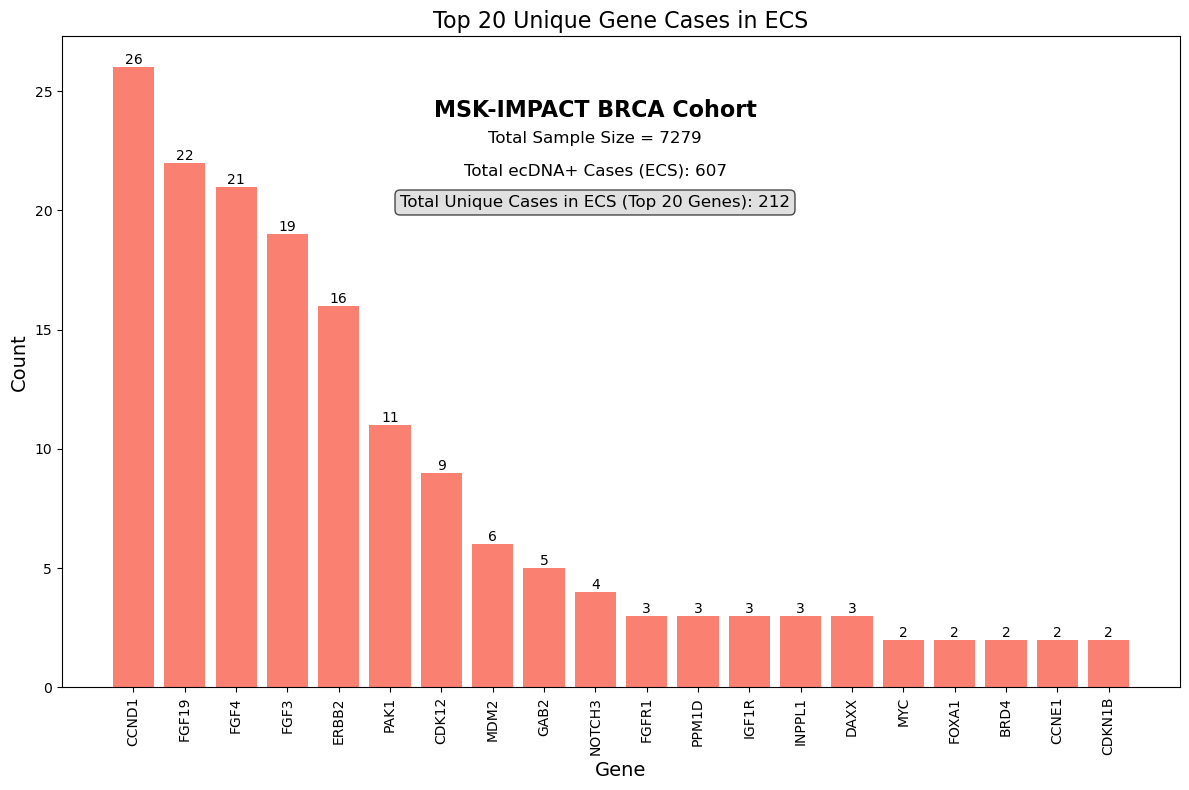

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene pairs for each dataset
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Identify unique cases to ECS
unique_ecs_cases = new_ecDNA[~new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1).isin(old_ecDNA_set_gene)]

# Count the unique cases by gene, showing only the top 20 genes
unique_ecs_gene_counts = unique_ecs_cases['gene'].value_counts().nlargest(20)

# Total ecDNA+ cases in ECS (total number of rows in new_ecDNA)
total_ecDNA_plus_cases_ecs = new_ecDNA.shape[0]

# Create the bar plot for the top 20 genes in ECS
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(unique_ecs_gene_counts.index, unique_ecs_gene_counts.values, color='salmon')

# Add count annotations on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Unique Gene Cases in ECS', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Main text annotations for the plot, aligned vertically with consistent x-position
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total ecDNA+ Cases (ECS): {total_ecDNA_plus_cases_ecs}", ha='center', va='top', fontsize=12)

# Text box with total unique cases for ECS (top 20 genes only)
total_unique_cases_ecs = unique_ecs_cases[['sample_id', 'gene']].drop_duplicates().shape[0]
plt.figtext(0.5, 0.75, f'Total Unique Cases in ECS (Top 20 Genes): {total_unique_cases_ecs}', ha='center', va='top', fontsize=12,
            bbox=dict(facecolor='lightgrey', alpha=0.7, boxstyle='round'))

# Save the plot in the same directory
output_path = os.path.join(directory, "unique_gene_cases_ecs_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


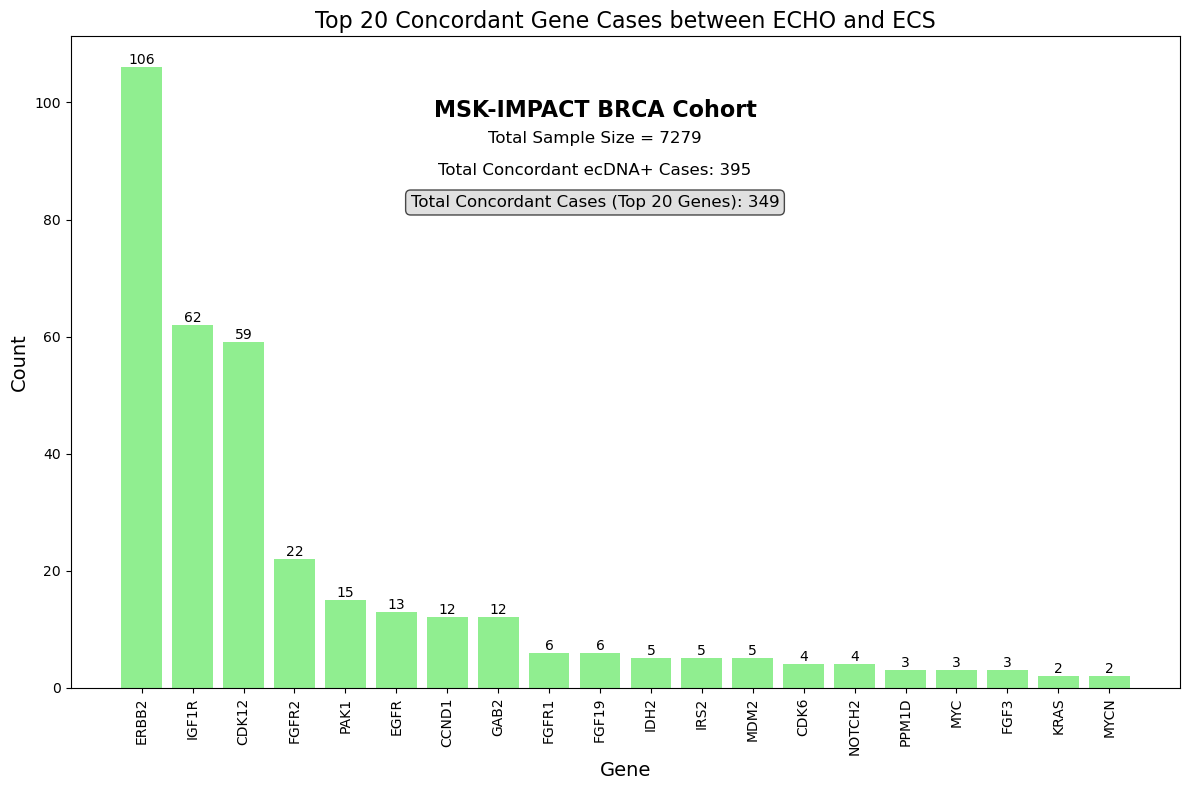

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Extract unique sample-gene pairs for each dataset
old_ecDNA_set_gene = set(old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_set_gene = set(new_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Identify concordant cases (present in both ECHO and ECS) and drop duplicates for unique sample-gene pairs
concordant_cases = old_ecDNA[old_ecDNA.apply(lambda row: (row['sample_id'], row['gene']), axis=1).isin(new_ecDNA_set_gene)]
concordant_cases = concordant_cases.drop_duplicates(subset=['sample_id', 'gene'])

# Count the concordant cases by gene, showing only the top 20 genes
concordant_gene_counts = concordant_cases['gene'].value_counts().nlargest(20)

# Total concordant cases across all genes (for annotation)
total_concordant_cases = concordant_cases.shape[0]

# Create the bar plot for the top 20 concordant genes
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(concordant_gene_counts.index, concordant_gene_counts.values, color='lightgreen')

# Add count annotations on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Concordant Gene Cases between ECHO and ECS', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Main text annotations for the plot with adjusted spacing
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total Concordant ecDNA+ Cases: {total_concordant_cases}", ha='center', va='top', fontsize=12)

# Text box with total concordant cases for the top 20 genes only, lowered for better spacing
total_top_20_concordant_cases = concordant_gene_counts.sum()
plt.figtext(0.5, 0.75, f'Total Concordant Cases (Top 20 Genes): {total_top_20_concordant_cases}', ha='center', va='top', fontsize=12,
            bbox=dict(facecolor='lightgrey', alpha=0.7, boxstyle='round'))

# Save the plot in the same directory
output_path = os.path.join(directory, "concordant_gene_cases_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


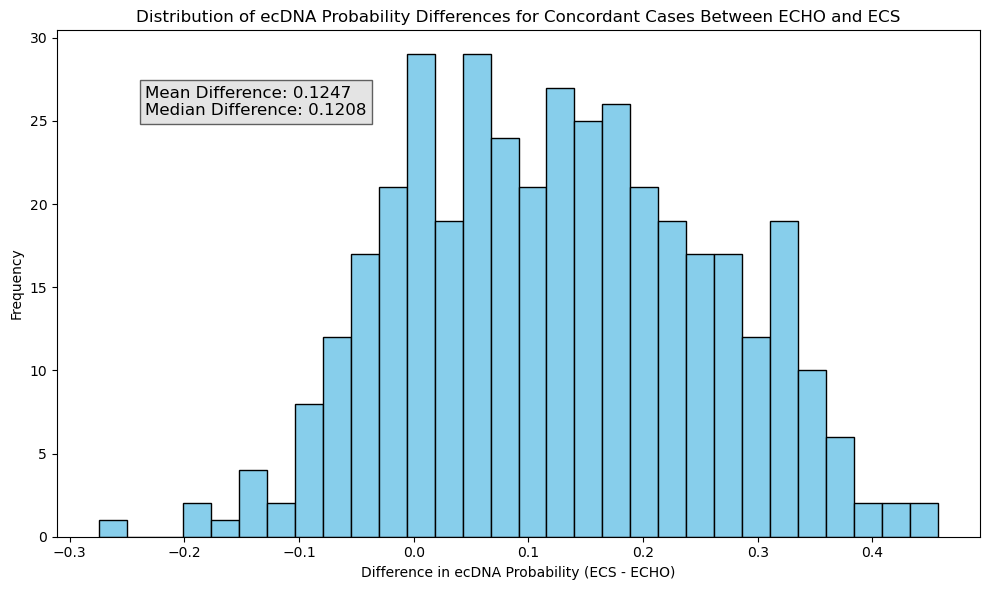

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Ensure unique sample-gene pairs by dropping duplicates
old_ecDNA = old_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])

# Identify concordant cases (present in both ECHO and ECS)
concordant_cases = old_ecDNA.merge(new_ecDNA, on=['sample_id', 'gene'], suffixes=('_old', '_new'))

# Calculate the difference in ecDNA_prob between versions
concordant_cases['ecDNA_prob_diff'] = concordant_cases['ecDNA_prob_new'] - concordant_cases['ecDNA_prob_old']

# Plot the distribution of ecDNA probability differences
plt.figure(figsize=(10, 6))
plt.hist(concordant_cases['ecDNA_prob_diff'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of ecDNA Probability Differences for Concordant Cases Between ECHO and ECS')
plt.xlabel('Difference in ecDNA Probability (ECS - ECHO)')
plt.ylabel('Frequency')

# Add text annotation for summary statistics
mean_diff = concordant_cases['ecDNA_prob_diff'].mean()
median_diff = concordant_cases['ecDNA_prob_diff'].median()
plt.figtext(0.15, 0.8, f'Mean Difference: {mean_diff:.4f}\nMedian Difference: {median_diff:.4f}', ha='left', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "ecDNA_prob_diff_concordant_cases_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


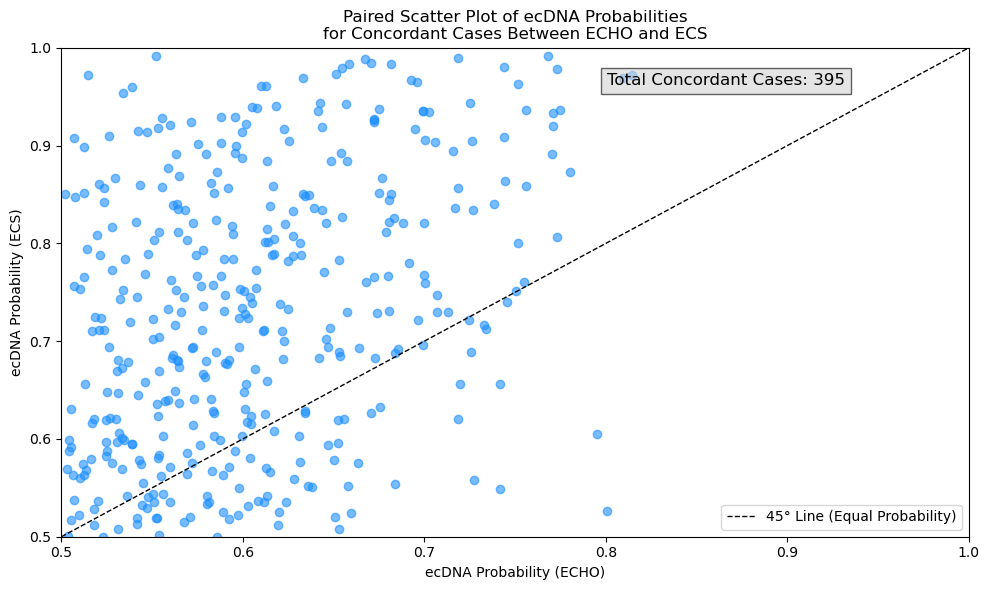

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the data
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5)
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)]
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)]

# Ensure unique sample-gene pairs by dropping duplicates
old_ecDNA = old_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_ecDNA.drop_duplicates(subset=['sample_id', 'gene'])

# Identify concordant cases (present in both ECHO and ECS)
concordant_cases = old_ecDNA.merge(new_ecDNA, on=['sample_id', 'gene'], suffixes=('_old', '_new'))

# Calculate total count of concordant cases
total_concordant_cases = concordant_cases.shape[0]

# Plot paired scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(concordant_cases['ecDNA_prob_old'], concordant_cases['ecDNA_prob_new'], alpha=0.6, color='dodgerblue')
plt.plot([0.5, 1], [0.5, 1], 'k--', linewidth=1, label='45° Line (Equal Probability)')

# Set axis limits from 0.5 to 1
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)

# Add plot title and labels
plt.title('Paired Scatter Plot of ecDNA Probabilities\nfor Concordant Cases Between ECHO and ECS')
plt.xlabel('ecDNA Probability (ECHO)')
plt.ylabel('ecDNA Probability (ECS)')
plt.legend()

# Add a text box with the total count of concordant cases in the top-right corner
plt.figtext(0.85, 0.85, f'Total Concordant Cases: {total_concordant_cases}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "paired_scatter_ecDNA_prob_concordant_cases.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


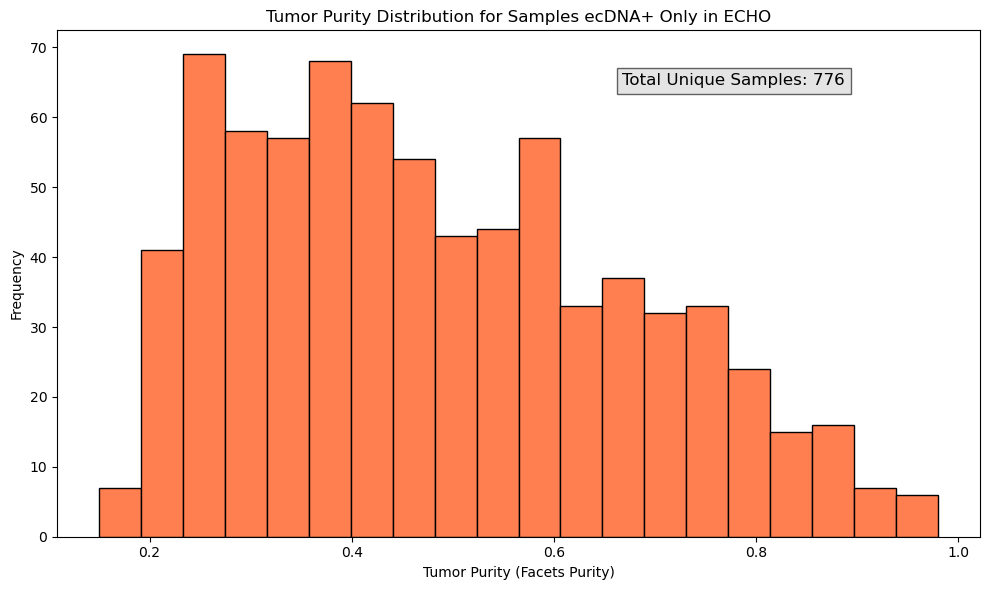

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
purity_file = os.path.join(directory, "facets_cbioportal_merged.tsv")

# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Identify samples that are ecDNA+ only in ECHO
old_ecDNA_set = set(old_ecDNA['sample_id'])
new_ecDNA_set = set(new_ecDNA['sample_id'])
only_echo_samples = old_ecDNA_set - new_ecDNA_set

# Filter purity data for samples that are only ecDNA+ in ECHO
only_echo_purity_data = purity_data[purity_data['ID'].isin(only_echo_samples)]

# Plot Tumor Purity for these samples
plt.figure(figsize=(10, 6))
plt.hist(only_echo_purity_data['Facets Purity'], bins=20, color='coral', edgecolor='black')
plt.title('Tumor Purity Distribution for Samples ecDNA+ Only in ECHO')
plt.xlabel('Tumor Purity (Facets Purity)')
plt.ylabel('Frequency')

# Add a text box with the total number of unique samples
total_only_echo_samples = only_echo_purity_data['ID'].nunique()
plt.figtext(0.85, 0.85, f'Total Unique Samples: {total_only_echo_samples}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "tumor_purity_ecDNA_plus_only_echo.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


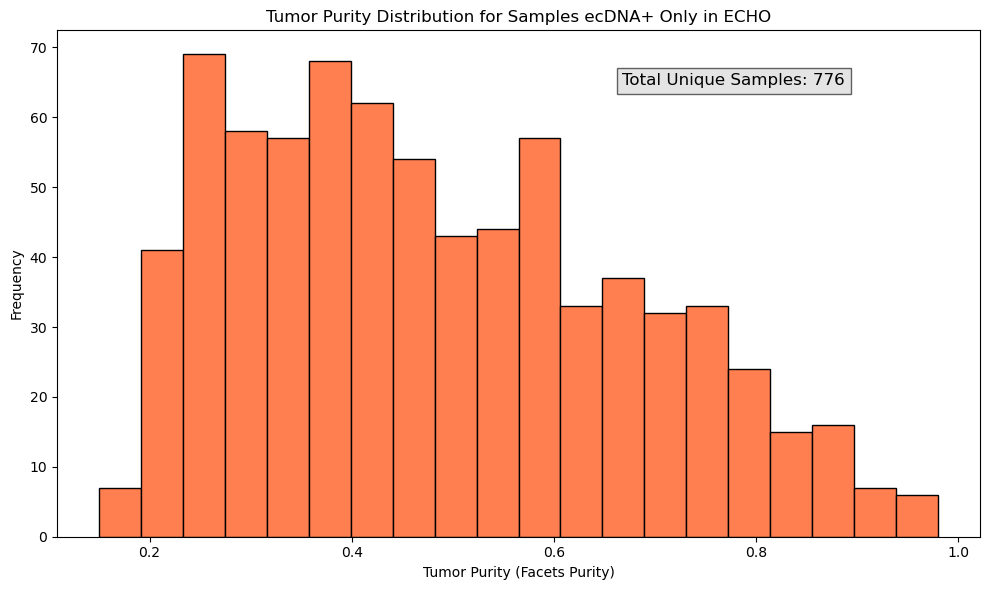

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
purity_file = os.path.join(directory, "facets_cbioportal_merged.tsv")

# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Identify unique samples that are ecDNA+ only in ECHO (not in ECS)
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])
only_echo_samples = old_ecDNA_samples - new_ecDNA_samples

# Check that the count of unique samples matches the expected 806
assert len(only_echo_samples) == 806, f"Expected 806 unique samples, but found {len(only_echo_samples)}"

# Filter purity data for samples that are only ecDNA+ in ECHO
only_echo_purity_data = purity_data[purity_data['ID'].isin(only_echo_samples)]

# Plot Tumor Purity for these samples
plt.figure(figsize=(10, 6))
plt.hist(only_echo_purity_data['Facets Purity'], bins=20, color='coral', edgecolor='black')
plt.title('Tumor Purity Distribution for Samples ecDNA+ Only in ECHO')
plt.xlabel('Tumor Purity (Facets Purity)')
plt.ylabel('Frequency')

# Add a text box with the total number of unique samples
total_only_echo_samples = only_echo_purity_data['ID'].nunique()
plt.figtext(0.85, 0.85, f'Total Unique Samples: {total_only_echo_samples}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))

# Save the plot in the same directory
output_path = os.path.join(directory, "tumor_purity_ecDNA_plus_only_echo.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


In [61]:
# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Get unique sample IDs for ecDNA+ cases in ECHO and ECS
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])

# Calculate total unique ecDNA+ samples in ECHO
total_unique_echo_samples = len(old_ecDNA_samples)
print(f'Total Unique Positive Samples in ECHO: {total_unique_echo_samples}')

# Calculate total unique concordant samples (ecDNA+ in both ECHO and ECS)
concordant_samples = old_ecDNA_samples & new_ecDNA_samples
total_concordant_samples = len(concordant_samples)
print(f'Total Unique Concordant Samples (ECHO and ECS): {total_concordant_samples}')

# Calculate total unique samples that are ecDNA+ only in ECHO
only_echo_samples = old_ecDNA_samples - new_ecDNA_samples
total_only_echo_samples = len(only_echo_samples)
print(f'Total Unique Samples ecDNA+ Only in ECHO: {total_only_echo_samples}')


Total Unique Positive Samples in ECHO: 1109
Total Unique Concordant Samples (ECHO and ECS): 303
Total Unique Samples ecDNA+ Only in ECHO: 806


In [62]:
# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Get unique sample IDs for ecDNA+ cases in ECHO and ECS
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])

# Filter purity data to only include samples with available tumor purity data
available_purity_samples = set(purity_data['ID'])

# Calculate total unique ecDNA+ samples in ECHO with purity data available
total_unique_echo_samples = len(old_ecDNA_samples & available_purity_samples)
print(f'Total Unique Positive Samples in ECHO with Purity Data: {total_unique_echo_samples}')

# Calculate total unique concordant samples (ecDNA+ in both ECHO and ECS with purity data available)
concordant_samples = (old_ecDNA_samples & new_ecDNA_samples) & available_purity_samples
total_concordant_samples = len(concordant_samples)
print(f'Total Unique Concordant Samples (ECHO and ECS) with Purity Data: {total_concordant_samples}')

# Calculate total unique samples that are ecDNA+ only in ECHO with purity data available
only_echo_samples = (old_ecDNA_samples - new_ecDNA_samples) & available_purity_samples
total_only_echo_samples = len(only_echo_samples)
print(f'Total Unique Samples ecDNA+ Only in ECHO with Purity Data: {total_only_echo_samples}')


Total Unique Positive Samples in ECHO with Purity Data: 1064
Total Unique Concordant Samples (ECHO and ECS) with Purity Data: 288
Total Unique Samples ecDNA+ Only in ECHO with Purity Data: 776


/tmp/ipykernel_56131/2611892996.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concordant_purity_data['Facets Purity'] = concordant_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

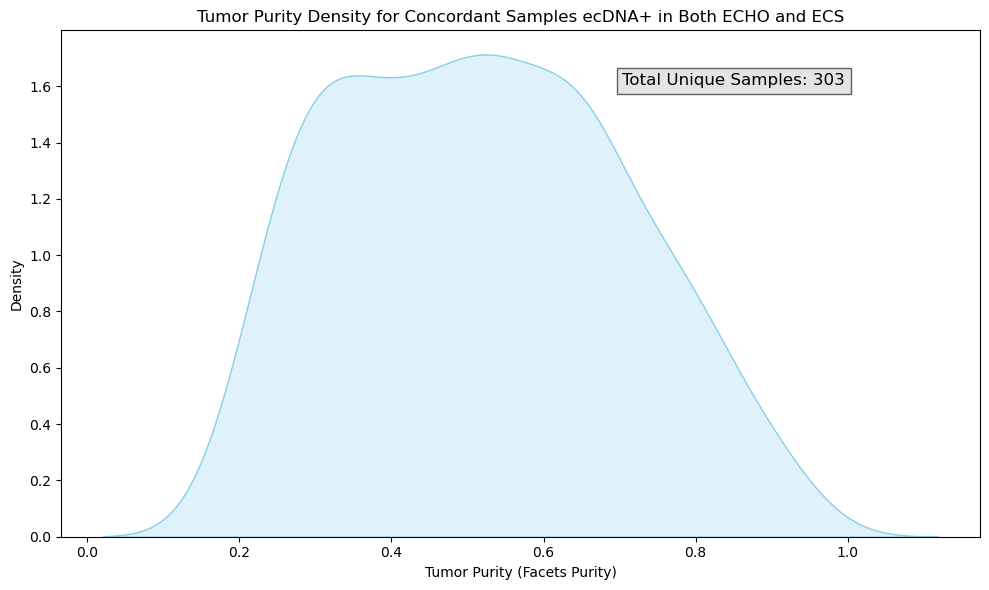

/tmp/ipykernel_56131/2611892996.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_echo_purity_data['Facets Purity'] = only_echo_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option

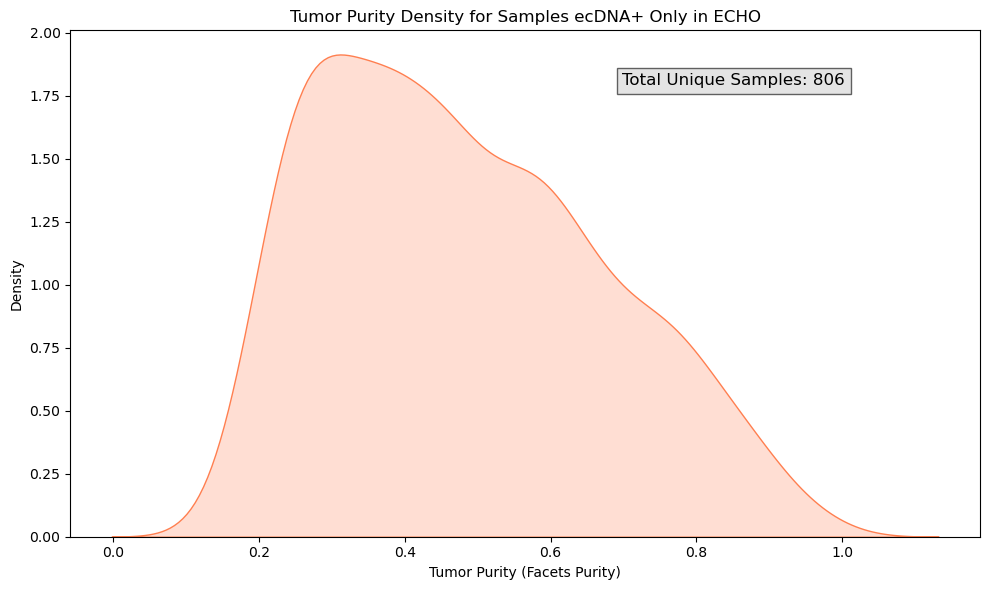

/tmp/ipykernel_56131/2611892996.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_ecs_purity_data['Facets Purity'] = only_ecs_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sumans/miniconda2/envs/ecDNA_analysis/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

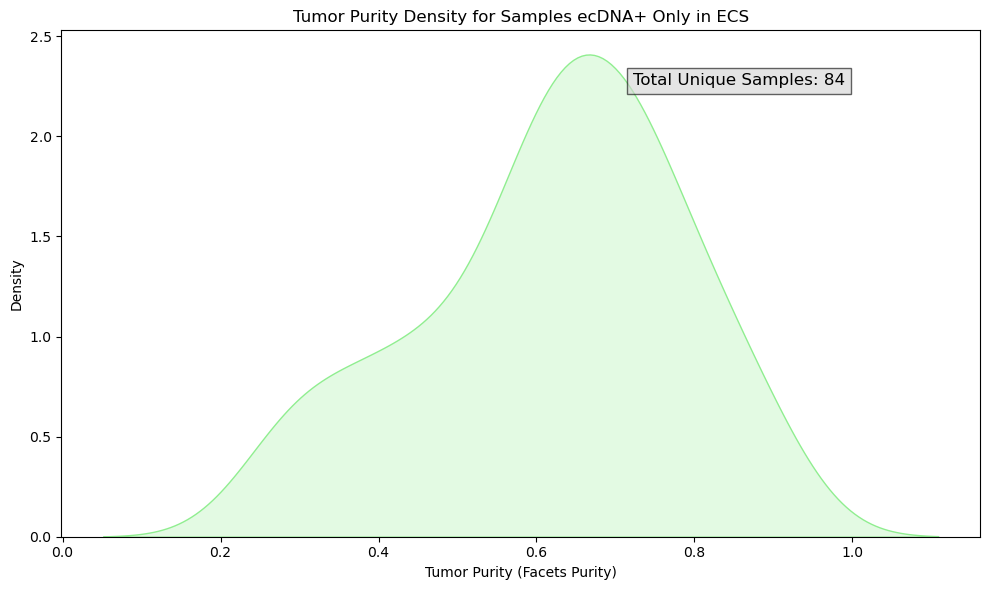

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
purity_file = os.path.join(directory, "facets_cbioportal_merged.tsv")

# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Get unique sample IDs for ecDNA+ cases in ECHO and ECS
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])

# Define a function to plot KDE for each scenario
def plot_kde(purity_data, title, total_samples, color, output_filename):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(purity_data['Facets Purity'], color=color, fill=True)
    plt.title(title)
    plt.xlabel('Tumor Purity (Facets Purity)')
    plt.ylabel('Density')
    plt.figtext(0.85, 0.85, f'Total Unique Samples: {total_samples}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))
    output_path = os.path.join(directory, output_filename)
    plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")
    plt.tight_layout()
    plt.show()

# 1. Concordant Samples (ecDNA+ in both ECHO and ECS)
concordant_samples = old_ecDNA_samples & new_ecDNA_samples
concordant_purity_data = purity_data[purity_data['ID'].isin(concordant_samples)]
concordant_purity_data['Facets Purity'] = concordant_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2

# Remove any unintended zero or near-zero values from purity data
concordant_purity_data = concordant_purity_data[concordant_purity_data['Facets Purity'] > 0.05]
total_concordant_samples = len(concordant_samples)
plot_kde(concordant_purity_data, 'Tumor Purity Density for Concordant Samples ecDNA+ in Both ECHO and ECS', total_concordant_samples, 'skyblue', "tumor_purity_ecDNA_plus_concordant_samples_density.png")

# 2. Unique ECHO Samples (ecDNA+ only in ECHO)
only_echo_samples = old_ecDNA_samples - new_ecDNA_samples
only_echo_purity_data = purity_data[purity_data['ID'].isin(only_echo_samples)]
only_echo_purity_data['Facets Purity'] = only_echo_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2

# Remove any unintended zero or near-zero values from purity data
only_echo_purity_data = only_echo_purity_data[only_echo_purity_data['Facets Purity'] > 0.05]
total_only_echo_samples = len(only_echo_samples)
plot_kde(only_echo_purity_data, 'Tumor Purity Density for Samples ecDNA+ Only in ECHO', total_only_echo_samples, 'coral', "tumor_purity_ecDNA_plus_only_echo_density.png")

# 3. Unique ECS Samples (ecDNA+ only in ECS)
only_ecs_samples = new_ecDNA_samples - old_ecDNA_samples
only_ecs_purity_data = purity_data[purity_data['ID'].isin(only_ecs_samples)]
only_ecs_purity_data['Facets Purity'] = only_ecs_purity_data['Facets Purity'].fillna(0.2)  # Replace missing values with 0.2

# Remove any unintended zero or near-zero values from purity data
only_ecs_purity_data = only_ecs_purity_data[only_ecs_purity_data['Facets Purity'] > 0.05]
total_only_ecs_samples = len(only_ecs_samples)
plot_kde(only_ecs_purity_data, 'Tumor Purity Density for Samples ecDNA+ Only in ECS', total_only_ecs_samples, 'lightgreen', "tumor_purity_ecDNA_plus_only_ecs_density.png")


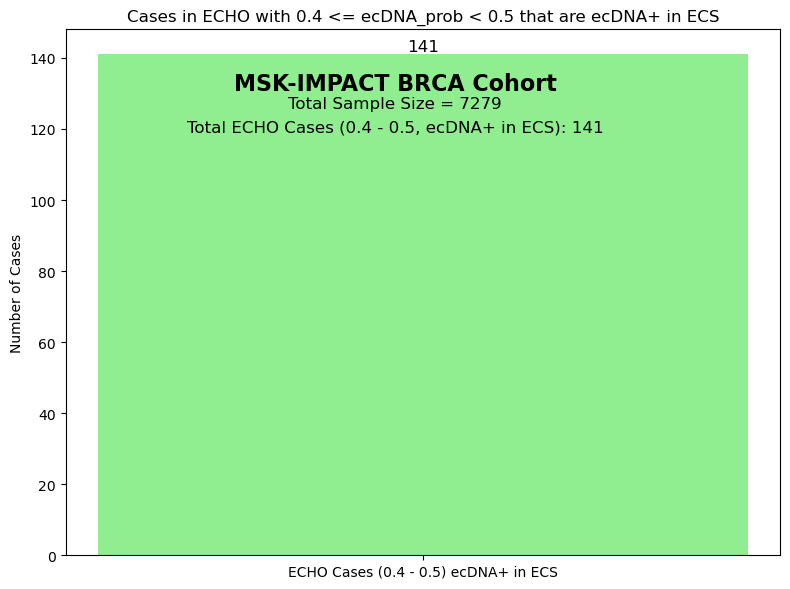

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

# Load the data
old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter ECHO cases with ecDNA probability between 0.4 and 0.5
echo_cases_between_0_4_and_0_5 = old_data[(old_data['ecDNA_prob'] >= 0.4) & (old_data['ecDNA_prob'] < 0.5)]

# Further filter new data to get ecDNA+ cases in ECS
new_ecDNA_plus_cases = new_data[new_data['ecDNA_prob'] >= 0.5]

# Identify unique sample-gene pairs for each dataset
echo_cases_set = set(echo_cases_between_0_4_and_0_5.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_plus_set = set(new_ecDNA_plus_cases.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Get the cases in ECHO that are between 0.4 and 0.5 and are ecDNA+ in ECS
unique_echo_cases_in_ecs = echo_cases_set & new_ecDNA_plus_set

# Count the number of unique cases
total_unique_cases_in_ecs = len(unique_echo_cases_in_ecs)

# Plot as a single bar
plt.figure(figsize=(8, 6))
plt.bar(["ECHO Cases (0.4 - 0.5) ecDNA+ in ECS"], [total_unique_cases_in_ecs], color='lightgreen')
plt.ylabel("Number of Cases")
plt.title("Cases in ECHO with 0.4 <= ecDNA_prob < 0.5 that are ecDNA+ in ECS")

# Add annotation for the count
plt.text(0, total_unique_cases_in_ecs, str(total_unique_cases_in_ecs), ha='center', va='bottom', fontsize=12)

# Text annotations similar to previous plots
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total ECHO Cases (0.4 - 0.5, ecDNA+ in ECS): {total_unique_cases_in_ecs}", ha='center', va='top', fontsize=12)

# Define the output path for saving the plot
output_path = os.path.join(directory, "echo_cases_0.4_0.5_in_ecs_plot.png")

# Save the plot with high resolution
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


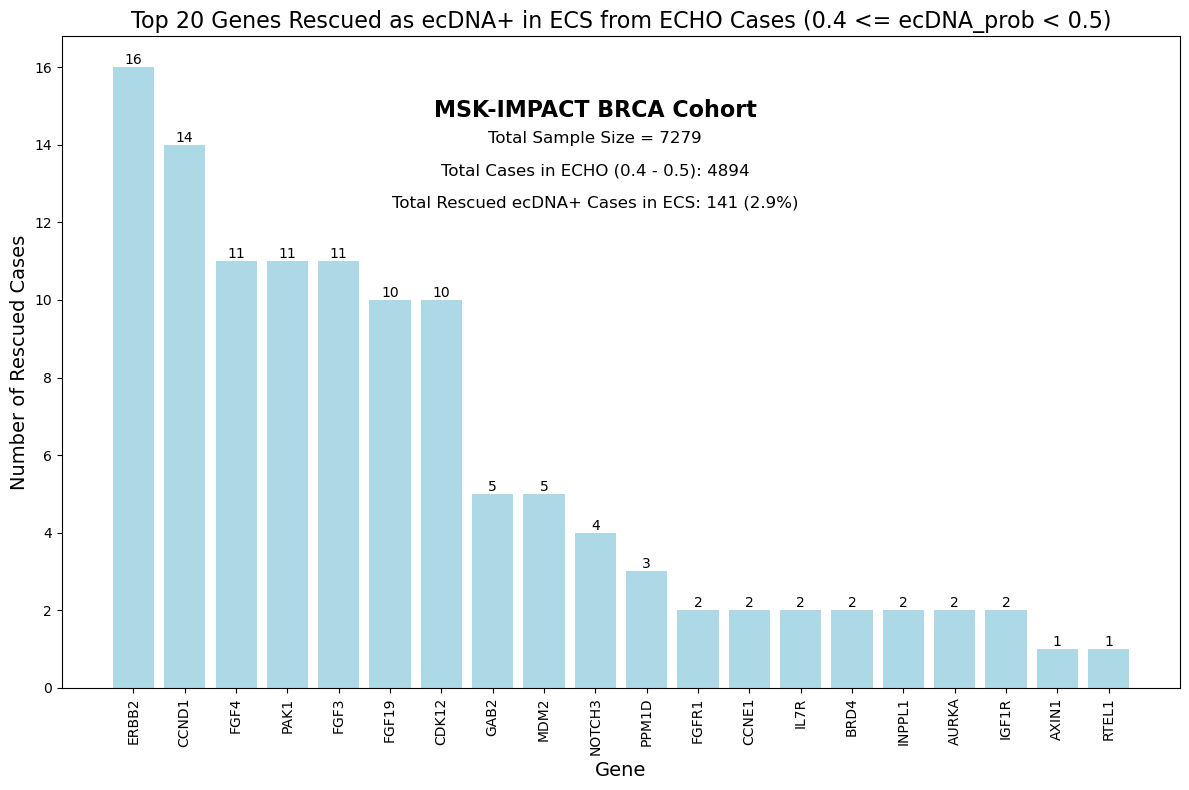

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file1_path = os.path.join(directory, "merged.ECHO_results.csv")
file2_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")

# Load the data
old_data = pd.read_csv(file1_path)
new_data = pd.read_csv(file2_path, sep='\t')

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter ECHO cases with ecDNA probability between 0.4 and 0.5
echo_cases_between_0_4_and_0_5 = old_data[(old_data['ecDNA_prob'] >= 0.4) & (old_data['ecDNA_prob'] < 0.5)]

# Filter ECS data to get ecDNA+ cases
new_ecDNA_plus_cases = new_data[new_data['ecDNA_prob'] >= 0.5]

# Identify unique sample-gene pairs for each dataset
echo_cases_set = set(echo_cases_between_0_4_and_0_5.apply(lambda row: (row['sample_id'], row['gene']), axis=1))
new_ecDNA_plus_set = set(new_ecDNA_plus_cases.apply(lambda row: (row['sample_id'], row['gene']), axis=1))

# Rescued cases (cases in ECHO that were between 0.4 - 0.5 and are now ecDNA+ in ECS)
rescued_cases = echo_cases_set & new_ecDNA_plus_set
rescued_cases_df = pd.DataFrame(list(rescued_cases), columns=['sample_id', 'gene'])

# Count the rescued cases by gene, showing only the top 20 genes
rescued_gene_counts = rescued_cases_df['gene'].value_counts().nlargest(20)

# Total rescued cases and total between 0.4 and 0.5 for percentage calculation
total_rescued_cases = len(rescued_cases_df)
total_cases_echo_0_4_0_5 = len(echo_cases_set)  # Total unique cases in ECHO with 0.4 <= ecDNA_prob < 0.5
rescued_percentage = (total_rescued_cases / total_cases_echo_0_4_0_5) * 100

# Create the bar plot for the top 20 genes
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(rescued_gene_counts.index, rescued_gene_counts.values, color='lightblue')

# Add count annotations on top of each bar
for bar, count in zip(bar_plot, rescued_gene_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Top 20 Genes Rescued as ecDNA+ in ECS from ECHO Cases (0.4 <= ecDNA_prob < 0.5)', fontsize=16)
plt.xlabel('Gene', fontsize=14)
plt.ylabel('Number of Rescued Cases', fontsize=14)
plt.xticks(rotation=90)

# Text box with total rescued cases, total cases between 0.4 and 0.5, and percentage information
plt.figtext(0.5, 0.87, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.83, "Total Sample Size = 7279", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.79, f"Total Cases in ECHO (0.4 - 0.5): {total_cases_echo_0_4_0_5}", ha='center', va='top', fontsize=12)
plt.figtext(0.5, 0.75, f"Total Rescued ecDNA+ Cases in ECS: {total_rescued_cases} ({rescued_percentage:.1f}%)", ha='center', va='top', fontsize=12)

# Define the output path for saving the plot
output_path = os.path.join(directory, "rescued_gene_cases_plot.png")

# Save the plot with high resolution
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


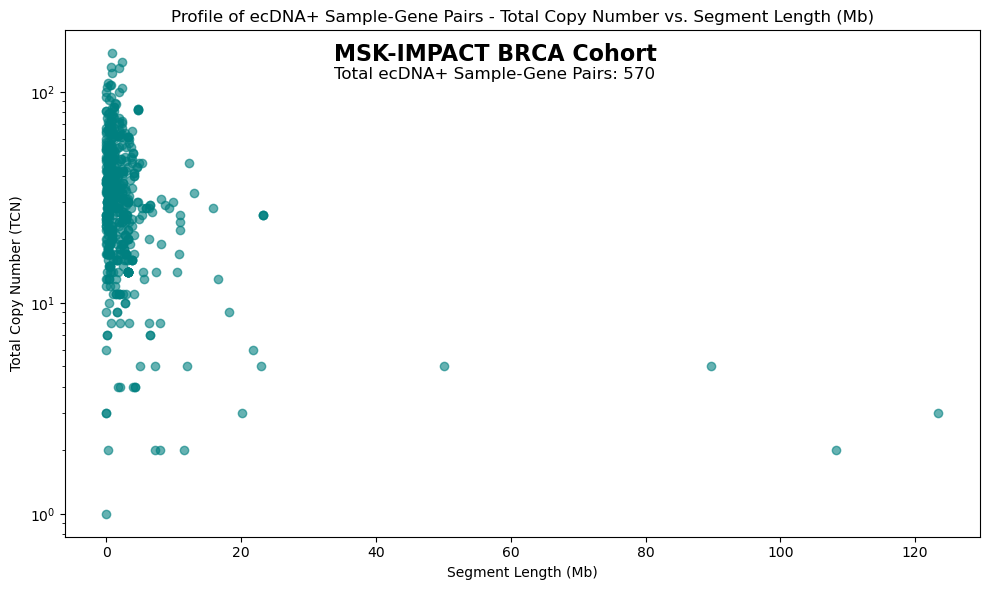

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
status_file_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
profile_file_path = os.path.join(directory, "merged_facets_filtered_p_ecDNA_filtered_impactGeneList.tsv")

# Load the ecDNA+ status file
status_data = pd.read_csv(status_file_path, sep='\t')

# Identify ecDNA+ cases at the sample+gene level
ecDNA_plus_pairs = status_data[status_data['ecDNA_status'] == 'ecDNA'][['sample_id', 'gene']]

# Load the profile data file
profile_data = pd.read_csv(profile_file_path, sep='\t')

# Merge profile data with ecDNA+ cases on sample and gene level
ecDNA_plus_profile_data = profile_data.merge(ecDNA_plus_pairs, left_on=['sample', 'gene'], right_on=['sample_id', 'gene'], how='inner')

# Convert 'tcn' and 'seg_length' columns to numeric if not already
ecDNA_plus_profile_data['tcn'] = pd.to_numeric(ecDNA_plus_profile_data['tcn'], errors='coerce')
ecDNA_plus_profile_data['seg_length'] = pd.to_numeric(ecDNA_plus_profile_data['seg_length'], errors='coerce')

# Convert segment length to megabases (Mb)
ecDNA_plus_profile_data['seg_length_mb'] = ecDNA_plus_profile_data['seg_length'] / 1_000_000

# Drop any rows with missing values in 'tcn' or 'seg_length_mb'
ecDNA_plus_profile_data = ecDNA_plus_profile_data.dropna(subset=['tcn', 'seg_length_mb'])

# Plot profile for ecDNA+ sample-gene pairs
plt.figure(figsize=(10, 6))
plt.scatter(ecDNA_plus_profile_data['seg_length_mb'], ecDNA_plus_profile_data['tcn'], alpha=0.6, color='teal')

# Add titles and labels
plt.title("Profile of ecDNA+ Sample-Gene Pairs - Total Copy Number vs. Segment Length (Mb)")
plt.xlabel("Segment Length (Mb)")
plt.ylabel("Total Copy Number (TCN)")
plt.yscale('log')  # Use log scale for clarity if copy numbers vary widely

# Annotate plot for total cases and additional info if needed
total_unique_pairs = ecDNA_plus_profile_data[['sample', 'gene']].drop_duplicates().shape[0]
plt.figtext(0.5, 0.92, "MSK-IMPACT BRCA Cohort", ha='center', va='top', fontsize=16, fontweight="bold")
plt.figtext(0.5, 0.88, f"Total ecDNA+ Sample-Gene Pairs: {total_unique_pairs}", ha='center', va='top', fontsize=12)

# Define the output path for saving the plot
output_path = os.path.join(directory, "ecDNA_plus_profile_sample_gene_plot.png")

# Save the plot with high resolution
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


Total ECS ecDNA+ pairs: 607
Total ECHO ecDNA+ pairs after deduplication: 1894
Total ECS FACETS pairs after merge: 607
Total ECHO FACETS pairs after merge: 2124


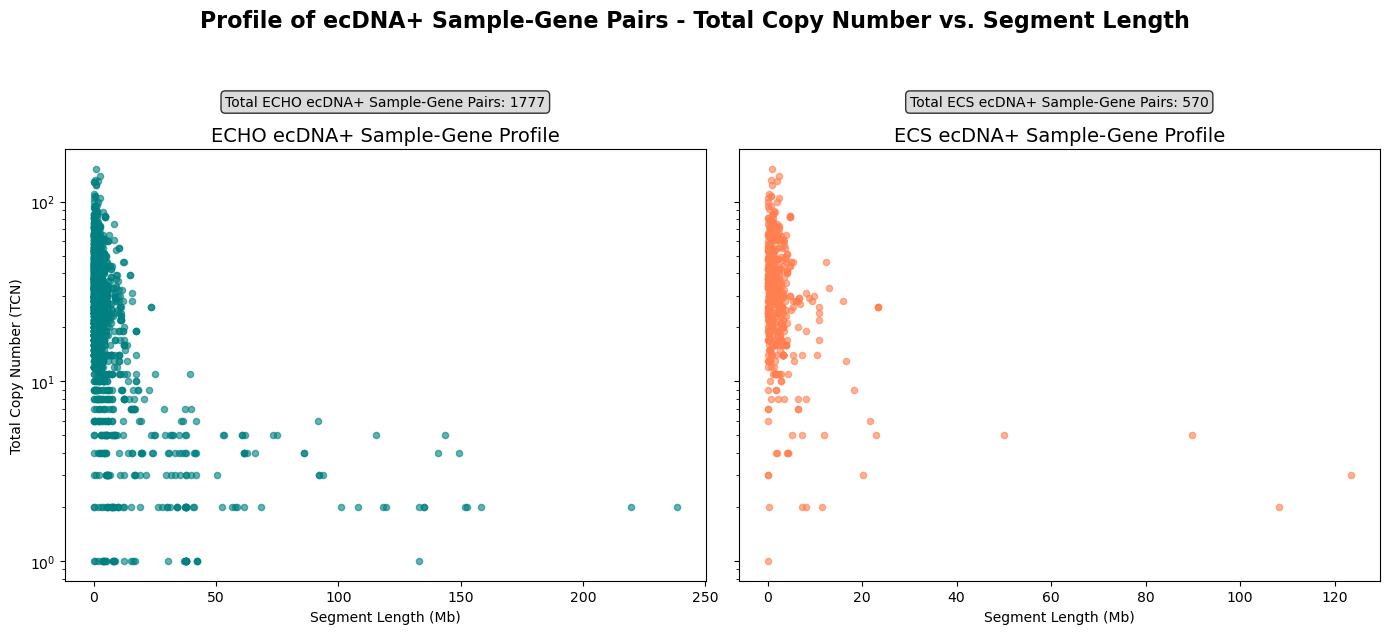

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define data paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
ecs_status_file_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
echo_status_file_path = os.path.join(directory, "merged.ECHO_results.csv")
ecs_facets_file_path = os.path.join(directory, "merged_facets_filtered_p_ecDNA_filtered_impactGeneList.tsv")
echo_facets_file_path = os.path.join(directory, "merged.FACETS_gene_results.tsv")  # Updated ECHO FACETS file

# Load ECS ecDNA+ status file and filter for ecDNA+ cases
ecs_status_data = pd.read_csv(ecs_status_file_path, sep='\t')
ecs_ecDNA_plus_pairs = ecs_status_data[ecs_status_data['ecDNA_status'] == 'ecDNA'][['sample_id', 'gene']].drop_duplicates()
print("Total ECS ecDNA+ pairs:", ecs_ecDNA_plus_pairs.shape[0])

# Load ECHO ecDNA+ status file and filter for ecDNA+ cases, splitting sample_id
echo_status_data = pd.read_csv(echo_status_file_path)
echo_status_data['sample_id'] = echo_status_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split to get sample identifier
echo_ecDNA_plus_pairs = echo_status_data[echo_status_data['ecDNA_status'] == 'ecDNA'][['sample_id', 'gene']].drop_duplicates()
print("Total ECHO ecDNA+ pairs after deduplication:", echo_ecDNA_plus_pairs.shape[0])

# Load ECS FACETS data and filter for ecDNA+ sample-gene pairs
ecs_facets_data = pd.read_csv(ecs_facets_file_path, sep='\t')
ecs_profile_data = ecs_facets_data.merge(ecs_ecDNA_plus_pairs, left_on=['sample', 'gene'], right_on=['sample_id', 'gene'], how='inner')
print("Total ECS FACETS pairs after merge:", ecs_profile_data.shape[0])

ecs_profile_data['tcn'] = pd.to_numeric(ecs_profile_data['tcn'], errors='coerce')
ecs_profile_data['seg_length'] = pd.to_numeric(ecs_profile_data['seg_length'], errors='coerce')
ecs_profile_data['seg_length_mb'] = ecs_profile_data['seg_length'] / 1_000_000
ecs_profile_data = ecs_profile_data.dropna(subset=['tcn', 'seg_length_mb'])

# Load ECHO FACETS data and filter for ecDNA+ sample-gene pairs
echo_facets_data = pd.read_csv(echo_facets_file_path, sep='\t')
echo_profile_data = echo_facets_data.merge(echo_ecDNA_plus_pairs, left_on=['sample', 'gene'], right_on=['sample_id', 'gene'], how='inner')
print("Total ECHO FACETS pairs after merge:", echo_profile_data.shape[0])

echo_profile_data['tcn'] = pd.to_numeric(echo_profile_data['tcn'], errors='coerce')
echo_profile_data['seg_length'] = pd.to_numeric(echo_profile_data['seg_length'], errors='coerce')
echo_profile_data['seg_length_mb'] = echo_profile_data['seg_length'] / 1_000_000
echo_profile_data = echo_profile_data.dropna(subset=['tcn', 'seg_length_mb'])

# Total unique sample-gene pairs for annotation
total_unique_ecs_pairs = ecs_profile_data[['sample', 'gene']].drop_duplicates().shape[0]
total_unique_echo_pairs = echo_profile_data[['sample', 'gene']].drop_duplicates().shape[0]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left Plot: ECHO Profile
ax1.scatter(echo_profile_data['seg_length_mb'], echo_profile_data['tcn'], alpha=0.6, color='teal', s=20)
ax1.set_title("ECHO ecDNA+ Sample-Gene Profile", fontsize=14)
ax1.set_xlabel("Segment Length (Mb)")
ax1.set_ylabel("Total Copy Number (TCN)")
ax1.set_yscale('log')  # Use log scale for clarity if copy numbers vary widely

# Adjusted Text box position for ECHO total count
textstr_echo = f"Total ECHO ecDNA+ Sample-Gene Pairs: {total_unique_echo_pairs}"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.8)
ax1.text(0.5, 1.1, textstr_echo, transform=ax1.transAxes, ha='center', fontsize=10, bbox=props)

# Right Plot: ECS Profile
ax2.scatter(ecs_profile_data['seg_length_mb'], ecs_profile_data['tcn'], alpha=0.6, color='coral', s=20)
ax2.set_title("ECS ecDNA+ Sample-Gene Profile", fontsize=14)
ax2.set_xlabel("Segment Length (Mb)")
ax2.set_yscale('log')  # Use log scale for clarity if copy numbers vary widely

# Adjusted Text box position for ECS total count
textstr_ecs = f"Total ECS ecDNA+ Sample-Gene Pairs: {total_unique_ecs_pairs}"
ax2.text(0.5, 1.1, textstr_ecs, transform=ax2.transAxes, ha='center', fontsize=10, bbox=props)

# Main title for the figure
plt.suptitle("Profile of ecDNA+ Sample-Gene Pairs - Total Copy Number vs. Segment Length", fontsize=16, fontweight="bold", y=1.05)

# Define the output path for saving the plot
output_path = os.path.join(directory, "ecDNA_plus_profile_sample_gene_plot_side_by_side.png")

# Save the plot with high resolution
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


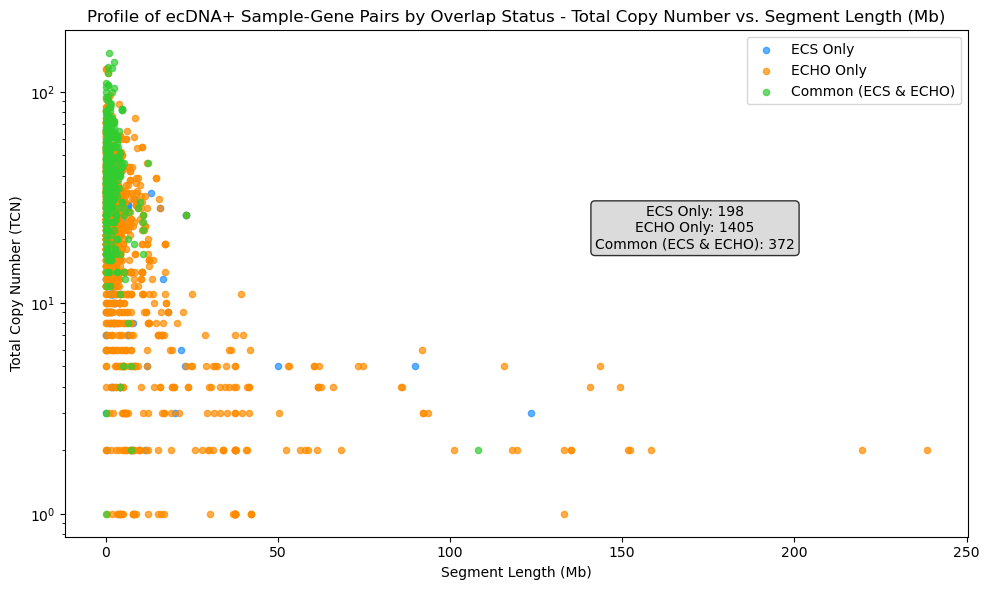

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define data paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
ecs_status_file_path = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
echo_status_file_path = os.path.join(directory, "merged.ECHO_results.csv")
ecs_facets_file_path = os.path.join(directory, "merged_facets_filtered_p_ecDNA_filtered_impactGeneList.tsv")
echo_facets_file_path = os.path.join(directory, "merged.FACETS_gene_results.tsv")  # ECHO FACETS file

# Load ECS and ECHO ecDNA+ status files
ecs_status_data = pd.read_csv(ecs_status_file_path, sep='\t')
echo_status_data = pd.read_csv(echo_status_file_path)

# Split ECHO sample_id for deduplication and filter for ecDNA+ cases
echo_status_data['sample_id'] = echo_status_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split to get sample identifier
ecs_ecDNA_plus_pairs = ecs_status_data[ecs_status_data['ecDNA_status'] == 'ecDNA'][['sample_id', 'gene']].drop_duplicates()
echo_ecDNA_plus_pairs = echo_status_data[echo_status_data['ecDNA_status'] == 'ecDNA'][['sample_id', 'gene']].drop_duplicates()

# Find common and unique pairs
common_pairs = pd.merge(ecs_ecDNA_plus_pairs, echo_ecDNA_plus_pairs, on=['sample_id', 'gene'])
only_esc_pairs = ecs_ecDNA_plus_pairs.merge(common_pairs, on=['sample_id', 'gene'], how='left', indicator=True)
only_esc_pairs = only_esc_pairs[only_esc_pairs['_merge'] == 'left_only'][['sample_id', 'gene']]
only_echo_pairs = echo_ecDNA_plus_pairs.merge(common_pairs, on=['sample_id', 'gene'], how='left', indicator=True)
only_echo_pairs = only_echo_pairs[only_echo_pairs['_merge'] == 'left_only'][['sample_id', 'gene']]

# Load ECS FACETS data and filter for ECS-only and common pairs
ecs_facets_data = pd.read_csv(ecs_facets_file_path, sep='\t')
ecs_only_profile_data = ecs_facets_data.merge(only_esc_pairs, left_on=['sample', 'gene'], right_on=['sample_id', 'gene'], how='inner')
common_profile_data = ecs_facets_data.merge(common_pairs, left_on=['sample', 'gene'], right_on=['sample_id', 'gene'], how='inner')

# Convert 'tcn' and 'seg_length' columns to numeric and calculate segment length in Mb
ecs_only_profile_data['tcn'] = pd.to_numeric(ecs_only_profile_data['tcn'], errors='coerce')
ecs_only_profile_data['seg_length'] = pd.to_numeric(ecs_only_profile_data['seg_length'], errors='coerce')
ecs_only_profile_data['seg_length_mb'] = ecs_only_profile_data['seg_length'] / 1_000_000
common_profile_data['tcn'] = pd.to_numeric(common_profile_data['tcn'], errors='coerce')
common_profile_data['seg_length'] = pd.to_numeric(common_profile_data['seg_length'], errors='coerce')
common_profile_data['seg_length_mb'] = common_profile_data['seg_length'] / 1_000_000

# Load ECHO FACETS data and filter for ECHO-only pairs
echo_facets_data = pd.read_csv(echo_facets_file_path, sep='\t')
echo_only_profile_data = echo_facets_data.merge(only_echo_pairs, left_on=['sample', 'gene'], right_on=['sample_id', 'gene'], how='inner')

# Convert 'tcn' and 'seg_length' columns to numeric and calculate segment length in Mb for ECHO-only data
echo_only_profile_data['tcn'] = pd.to_numeric(echo_only_profile_data['tcn'], errors='coerce')
echo_only_profile_data['seg_length'] = pd.to_numeric(echo_only_profile_data['seg_length'], errors='coerce')
echo_only_profile_data['seg_length_mb'] = echo_only_profile_data['seg_length'] / 1_000_000

# Drop any rows with missing values in 'tcn' or 'seg_length_mb' in all three datasets
ecs_only_profile_data = ecs_only_profile_data.dropna(subset=['tcn', 'seg_length_mb'])
echo_only_profile_data = echo_only_profile_data.dropna(subset=['tcn', 'seg_length_mb'])
common_profile_data = common_profile_data.dropna(subset=['tcn', 'seg_length_mb'])

# Calculate counts for each category
total_ecs_only = ecs_only_profile_data[['sample', 'gene']].drop_duplicates().shape[0]
total_echo_only = echo_only_profile_data[['sample', 'gene']].drop_duplicates().shape[0]
total_common = common_profile_data[['sample', 'gene']].drop_duplicates().shape[0]

# Plot the three categories with high-contrast colors and reduced dot size
plt.figure(figsize=(10, 6))
plt.scatter(ecs_only_profile_data['seg_length_mb'], ecs_only_profile_data['tcn'], color='dodgerblue', s=20, alpha=0.7, label='ECS Only')
plt.scatter(echo_only_profile_data['seg_length_mb'], echo_only_profile_data['tcn'], color='darkorange', s=20, alpha=0.7, label='ECHO Only')
plt.scatter(common_profile_data['seg_length_mb'], common_profile_data['tcn'], color='limegreen', s=20, alpha=0.7, label='Common (ECS & ECHO)')

# Add titles, labels, and legend
plt.title("Profile of ecDNA+ Sample-Gene Pairs by Overlap Status - Total Copy Number vs. Segment Length (Mb)")
plt.xlabel("Segment Length (Mb)")
plt.ylabel("Total Copy Number (TCN)")
plt.yscale('log')  # Use log scale for clarity if copy numbers vary widely
plt.legend()

# Text boxes for counts, positioned below the legend
textstr = f"ECS Only: {total_ecs_only}\nECHO Only: {total_echo_only}\nCommon (ECS & ECHO): {total_common}"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.8)
plt.gcf().text(0.7, 0.65, textstr, ha='center', va='top', fontsize=10, bbox=props)

# Save and show the plot
output_path = os.path.join(directory, "ecDNA_plus_overlap_profile_plot.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


Total ecDNA+ in Both: 424 (Expected: 395)
Total ecDNA+ in ECHO Only: 811


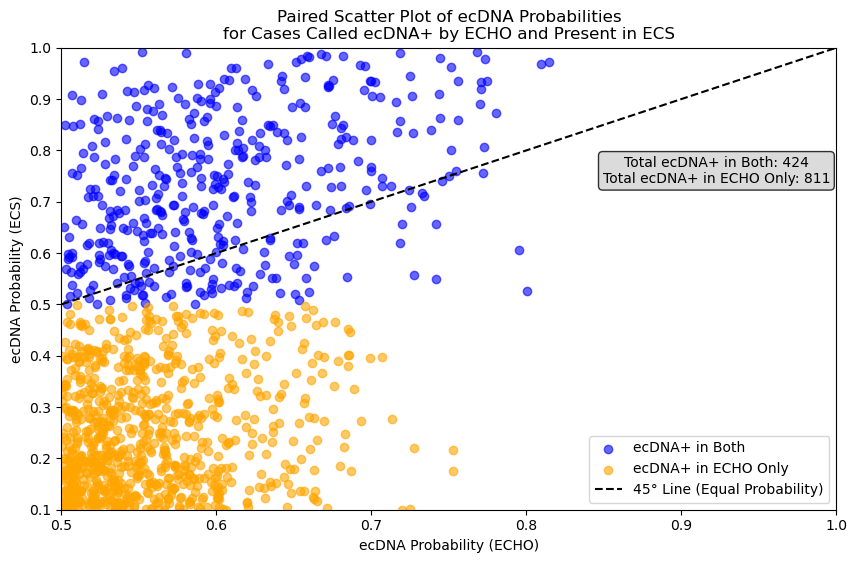

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_noCN_filtered_0.1.tsv")

# Load ECHO data, split sample IDs, and filter for ecDNA+ cases, removing duplicates
echo_data = pd.read_csv(echo_file)
echo_data['sample_id'] = echo_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split sample ID
echo_ecDNA_plus = echo_data[echo_data['ecDNA_status'] == 'ecDNA'][['sample_id', 'gene', 'ecDNA_prob', 'ecDNA_status']]

# Remove duplicates based only on sample-gene pairs
echo_ecDNA_plus = echo_ecDNA_plus.drop_duplicates(subset=['sample_id', 'gene'])

# Load ECS data
ecs_data = pd.read_csv(ecs_file, sep='\t')

# Merge the two dataframes on sample_id and gene to find cases present in both, then deduplicate
merged_data = pd.merge(echo_ecDNA_plus, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs'))

# Filter for categories based on ecDNA+ status
both_positive = merged_data[(merged_data['ecDNA_status_echo'] == 'ecDNA') & (merged_data['ecDNA_status_ecs'] == 'ecDNA')]
echo_only_positive = merged_data[(merged_data['ecDNA_status_echo'] == 'ecDNA') & (merged_data['ecDNA_status_ecs'] != 'ecDNA')]

# Verify counts to match previous findings
total_both_positive = both_positive.shape[0]
total_echo_only_positive = echo_only_positive.shape[0]

print(f"Total ecDNA+ in Both: {total_both_positive} (Expected: 395)")
print(f"Total ecDNA+ in ECHO Only: {total_echo_only_positive}")

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Plot each category with different colors
plt.scatter(both_positive['ecDNA_prob_echo'], both_positive['ecDNA_prob_ecs'], color='blue', label="ecDNA+ in Both", alpha=0.6)
plt.scatter(echo_only_positive['ecDNA_prob_echo'], echo_only_positive['ecDNA_prob_ecs'], color='orange', label="ecDNA+ in ECHO Only", alpha=0.6)

# Add a 45° reference line for equal probabilities
plt.plot([0.1, 1], [0.1, 1], 'k--', label="45° Line (Equal Probability)")

# Title and labels
plt.title("Paired Scatter Plot of ecDNA Probabilities\nfor Cases Called ecDNA+ by ECHO and Present in ECS")
plt.xlabel("ecDNA Probability (ECHO)")
plt.ylabel("ecDNA Probability (ECS)")
plt.xlim(0.5, 1)  # Start from 0.1 to include lower probabilities in ECS
plt.ylim(0.1, 1)

# Text box with total case counts
textstr = f"Total ecDNA+ in Both: {total_both_positive}\nTotal ecDNA+ in ECHO Only: {total_echo_only_positive}"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.8)
plt.gcf().text(0.78, 0.7, textstr, ha='center', va='top', fontsize=10, bbox=props)

# Legend
plt.legend()

# Save the plot
output_path = os.path.join(directory, "ecDNA_prob_scatter_plot_concordant_cases_color_coded.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.show()


Total ecDNA+ in Both: 418
Total ecDNA+ in ECHO Only: 788
Total ecDNA+ in ECS Only: 227


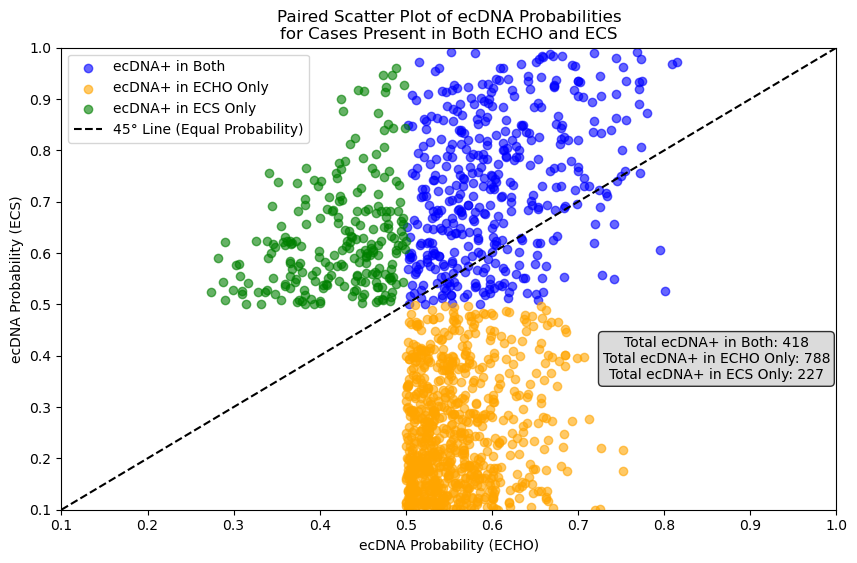

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_noCN_filtered_0.1.tsv")

# Load ECHO data, split sample IDs, and remove duplicates by sample-gene only
echo_data = pd.read_csv(echo_file)
echo_data['sample_id'] = echo_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split sample ID
echo_data = echo_data[['sample_id', 'gene', 'ecDNA_prob', 'ecDNA_status']].drop_duplicates(subset=['sample_id', 'gene'])

# Load ECS data
ecs_data = pd.read_csv(ecs_file, sep='\t')

# Merge the two dataframes on sample_id and gene to find cases present in both, then deduplicate
merged_data = pd.merge(echo_data, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs'))

# Categorize cases based on ecDNA status in both versions
both_positive = merged_data[(merged_data['ecDNA_status_echo'] == 'ecDNA') & (merged_data['ecDNA_status_ecs'] == 'ecDNA')]
echo_only_positive = merged_data[(merged_data['ecDNA_status_echo'] == 'ecDNA') & (merged_data['ecDNA_status_ecs'] != 'ecDNA')]
ecs_only_positive = merged_data[(merged_data['ecDNA_status_echo'] != 'ecDNA') & (merged_data['ecDNA_status_ecs'] == 'ecDNA')]

# Print counts for verification
print(f"Total ecDNA+ in Both: {both_positive.shape[0]}")
print(f"Total ecDNA+ in ECHO Only: {echo_only_positive.shape[0]}")
print(f"Total ecDNA+ in ECS Only: {ecs_only_positive.shape[0]}")

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Plot each category with different colors
plt.scatter(both_positive['ecDNA_prob_echo'], both_positive['ecDNA_prob_ecs'], color='blue', label="ecDNA+ in Both", alpha=0.6)
plt.scatter(echo_only_positive['ecDNA_prob_echo'], echo_only_positive['ecDNA_prob_ecs'], color='orange', label="ecDNA+ in ECHO Only", alpha=0.6)
plt.scatter(ecs_only_positive['ecDNA_prob_echo'], ecs_only_positive['ecDNA_prob_ecs'], color='green', label="ecDNA+ in ECS Only", alpha=0.6)

# Add a 45° reference line for equal probabilities
plt.plot([0.1, 1], [0.1, 1], 'k--', label="45° Line (Equal Probability)")

# Title and labels
plt.title("Paired Scatter Plot of ecDNA Probabilities\nfor Cases Present in Both ECHO and ECS")
plt.xlabel("ecDNA Probability (ECHO)")
plt.ylabel("ecDNA Probability (ECS)")
plt.xlim(0.1, 1)  # Start from 0.1 to include lower probabilities in ECS
plt.ylim(0.1, 1)

# Text box with total case counts
textstr = (
    f"Total ecDNA+ in Both: {both_positive.shape[0]}\n"
    f"Total ecDNA+ in ECHO Only: {echo_only_positive.shape[0]}\n"
    f"Total ecDNA+ in ECS Only: {ecs_only_positive.shape[0]}"
)
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.8)
plt.gcf().text(0.78, 0.4, textstr, ha='center', va='top', fontsize=10, bbox=props)

# Legend
plt.legend()

# Save the plot
output_path = os.path.join(directory, "ecDNA_prob_scatter_plot_concordant_cases_color_coded.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.show()


In [19]:
import pandas as pd
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_noCN_filtered_0.1.tsv")

# Load ECHO data and split sample IDs
echo_data = pd.read_csv(echo_file)
echo_data['sample_id'] = echo_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split sample ID

# Load ECS data
ecs_data = pd.read_csv(ecs_file, sep='\t')

# Merge without filtering for ecDNA+ in ECHO
merged_data_no_filter = pd.merge(echo_data, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs')).drop_duplicates(subset=['sample_id', 'gene'])
print(f"Total records without filtering for ecDNA+ in ECHO: {merged_data_no_filter.shape[0]}")

# Apply ecDNA+ filter in ECHO and merge again
echo_ecDNA_plus = echo_data[echo_data['ecDNA_status'] == 'ecDNA']
merged_data_with_filter = pd.merge(echo_ecDNA_plus, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs')).drop_duplicates(subset=['sample_id', 'gene'])
print(f"Total records with ecDNA+ filter in ECHO: {merged_data_with_filter.shape[0]}")


Total records without filtering for ecDNA+ in ECHO: 6154
Total records with ecDNA+ filter in ECHO: 1235


In [20]:
import pandas as pd
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_noCN_filtered_0.1.tsv")

# Load ECHO data and split sample IDs
echo_data = pd.read_csv(echo_file)
echo_data['sample_id'] = echo_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split sample ID

# Load ECS data
ecs_data = pd.read_csv(ecs_file, sep='\t')

# Merge without filtering for ecDNA+ in ECHO
merged_data_no_filter = pd.merge(echo_data, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs')).drop_duplicates(subset=['sample_id', 'gene'])
print(f"Total records without filtering for ecDNA+ in ECHO: {merged_data_no_filter.shape[0]}")

# Find concordant records (ecDNA+ in both) in the unfiltered merge
concordant_no_filter = merged_data_no_filter[(merged_data_no_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                             (merged_data_no_filter['ecDNA_status_ecs'] == 'ecDNA')]
print(f"Concordant ecDNA+ records without filtering: {concordant_no_filter.shape[0]}")

# Apply ecDNA+ filter in ECHO and merge again
echo_ecDNA_plus = echo_data[echo_data['ecDNA_status'] == 'ecDNA']
merged_data_with_filter = pd.merge(echo_ecDNA_plus, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs')).drop_duplicates(subset=['sample_id', 'gene'])
print(f"Total records with ecDNA+ filter in ECHO: {merged_data_with_filter.shape[0]}")

# Find concordant records (ecDNA+ in both) in the filtered merge
concordant_with_filter = merged_data_with_filter[(merged_data_with_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                                 (merged_data_with_filter['ecDNA_status_ecs'] == 'ecDNA')]
print(f"Concordant ecDNA+ records with ecDNA+ filter in ECHO: {concordant_with_filter.shape[0]}")


Total records without filtering for ecDNA+ in ECHO: 6154
Concordant ecDNA+ records without filtering: 418
Total records with ecDNA+ filter in ECHO: 1235
Concordant ecDNA+ records with ecDNA+ filter in ECHO: 424


In [21]:
import pandas as pd
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_noCN_filtered_0.1.tsv")

# Load ECHO data, split sample IDs, and drop duplicates on sample-gene
echo_data = pd.read_csv(echo_file)
echo_data['sample_id'] = echo_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split sample ID
echo_data = echo_data.drop_duplicates(subset=['sample_id', 'gene'])

# Load ECS data and drop duplicates on sample-gene
ecs_data = pd.read_csv(ecs_file, sep='\t')
ecs_data = ecs_data.drop_duplicates(subset=['sample_id', 'gene'])

# Merge without filtering for ecDNA+ in ECHO
merged_data_no_filter = pd.merge(echo_data, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs'))
print(f"Total records without filtering for ecDNA+ in ECHO: {merged_data_no_filter.shape[0]}")

# Find concordant records (ecDNA+ in both) in the unfiltered merge
concordant_no_filter = merged_data_no_filter[(merged_data_no_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                             (merged_data_no_filter['ecDNA_status_ecs'] == 'ecDNA')]
print(f"Concordant ecDNA+ records without filtering: {concordant_no_filter.shape[0]}")

# Apply ecDNA+ filter in ECHO and merge again
echo_ecDNA_plus = echo_data[echo_data['ecDNA_status'] == 'ecDNA']
merged_data_with_filter = pd.merge(echo_ecDNA_plus, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs'))
print(f"Total records with ecDNA+ filter in ECHO: {merged_data_with_filter.shape[0]}")

# Find concordant records (ecDNA+ in both) in the filtered merge
concordant_with_filter = merged_data_with_filter[(merged_data_with_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                                 (merged_data_with_filter['ecDNA_status_ecs'] == 'ecDNA')]
print(f"Concordant ecDNA+ records with ecDNA+ filter in ECHO: {concordant_with_filter.shape[0]}")


Total records without filtering for ecDNA+ in ECHO: 6154
Concordant ecDNA+ records without filtering: 418
Total records with ecDNA+ filter in ECHO: 1206
Concordant ecDNA+ records with ecDNA+ filter in ECHO: 418


In [22]:
import pandas as pd
import os

# Define the directory and file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_noCN_filtered_0.1.tsv")

# Load ECHO data, split sample IDs, and drop duplicates on sample-gene
echo_data = pd.read_csv(echo_file)
echo_data['sample_id'] = echo_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))  # Split sample ID
echo_data = echo_data.drop_duplicates(subset=['sample_id', 'gene'])

# Load ECS data and drop duplicates on sample-gene
ecs_data = pd.read_csv(ecs_file, sep='\t')
ecs_data = ecs_data.drop_duplicates(subset=['sample_id', 'gene'])

# Merge without filtering for ecDNA+ in ECHO
merged_data_no_filter = pd.merge(echo_data, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs'))
print(f"Total records without filtering for ecDNA+ in ECHO: {merged_data_no_filter.shape[0]}")

# Find concordant records (ecDNA+ in both) in the unfiltered merge
concordant_no_filter = merged_data_no_filter[(merged_data_no_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                             (merged_data_no_filter['ecDNA_status_ecs'] == 'ecDNA')]
print(f"Concordant ecDNA+ records without filtering: {concordant_no_filter.shape[0]}")

# Find cases ecDNA+ in ECHO only in the unfiltered merge
echo_only_no_filter = merged_data_no_filter[(merged_data_no_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                            (merged_data_no_filter['ecDNA_status_ecs'] != 'ecDNA')]
print(f"ecDNA+ in ECHO only (without filtering): {echo_only_no_filter.shape[0]}")

# Apply ecDNA+ filter in ECHO and merge again
echo_ecDNA_plus = echo_data[echo_data['ecDNA_status'] == 'ecDNA']
merged_data_with_filter = pd.merge(echo_ecDNA_plus, ecs_data, on=['sample_id', 'gene'], suffixes=('_echo', '_ecs'))
print(f"Total records with ecDNA+ filter in ECHO: {merged_data_with_filter.shape[0]}")

# Find concordant records (ecDNA+ in both) in the filtered merge
concordant_with_filter = merged_data_with_filter[(merged_data_with_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                                 (merged_data_with_filter['ecDNA_status_ecs'] == 'ecDNA')]
print(f"Concordant ecDNA+ records with ecDNA+ filter in ECHO: {concordant_with_filter.shape[0]}")

# Find cases ecDNA+ in ECHO only in the filtered merge
echo_only_with_filter = merged_data_with_filter[(merged_data_with_filter['ecDNA_status_echo'] == 'ecDNA') & 
                                                (merged_data_with_filter['ecDNA_status_ecs'] != 'ecDNA')]
print(f"ecDNA+ in ECHO only (with ecDNA+ filter in ECHO): {echo_only_with_filter.shape[0]}")


Total records without filtering for ecDNA+ in ECHO: 6154
Concordant ecDNA+ records without filtering: 418
ecDNA+ in ECHO only (without filtering): 788
Total records with ecDNA+ filter in ECHO: 1206
Concordant ecDNA+ records with ecDNA+ filter in ECHO: 418
ecDNA+ in ECHO only (with ecDNA+ filter in ECHO): 788


In [9]:
# Count the rows where 'Facets Purity' is missing or NA
missing_purity_count = data['Facets Purity'].isna().sum()

print(f"Number of rows with missing or NA tumor purity: {missing_purity_count}")


Number of rows with missing or NA tumor purity: 0


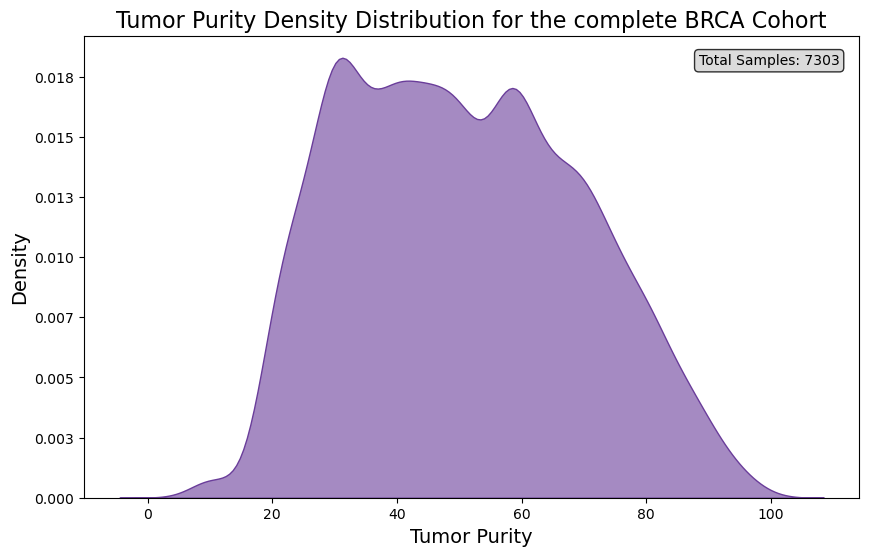

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter

# Load the data file
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file_path = os.path.join(directory, "FileA_run.tsv.facets.tsv")

# Read the data, specifying that there is no header row
data = pd.read_csv(file_path, sep='\t', header=None, skiprows=1)

# Use column 1 as Tumor Purity, and replace missing values with 0.2 (representing 20%)
data[1] = pd.to_numeric(data[1], errors='coerce')  # Convert Tumor Purity to numeric
data[1].fillna(0.2, inplace=True)  # Replace NA/missing values with 0.2

# Plot the density of tumor purity
plt.figure(figsize=(10, 6))
sns.kdeplot(data[1], fill=True, color='#6a3d9a', alpha=0.6)
plt.title('Tumor Purity Density Distribution for the complete BRCA Cohort', fontsize=16)
plt.xlabel('Tumor Purity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Format y-axis to 1 decimal place
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.3f}'))

# Add a text box with total sample count
total_samples = data.shape[0]
textstr = f"Total Samples: {total_samples}"
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.8)
plt.gcf().text(0.81, 0.85, textstr, ha='center', va='top', fontsize=10, bbox=props)  # Adjusted position

# Save the plot in the same directory
output_path = os.path.join(directory, "tumor_purity_density_plot_updated.png")
plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")

plt.show()


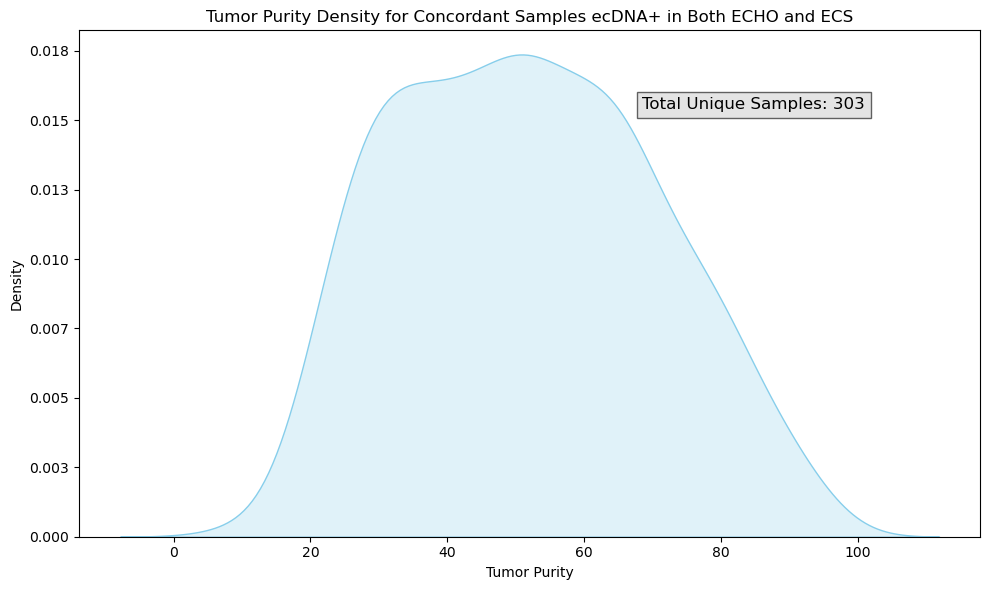

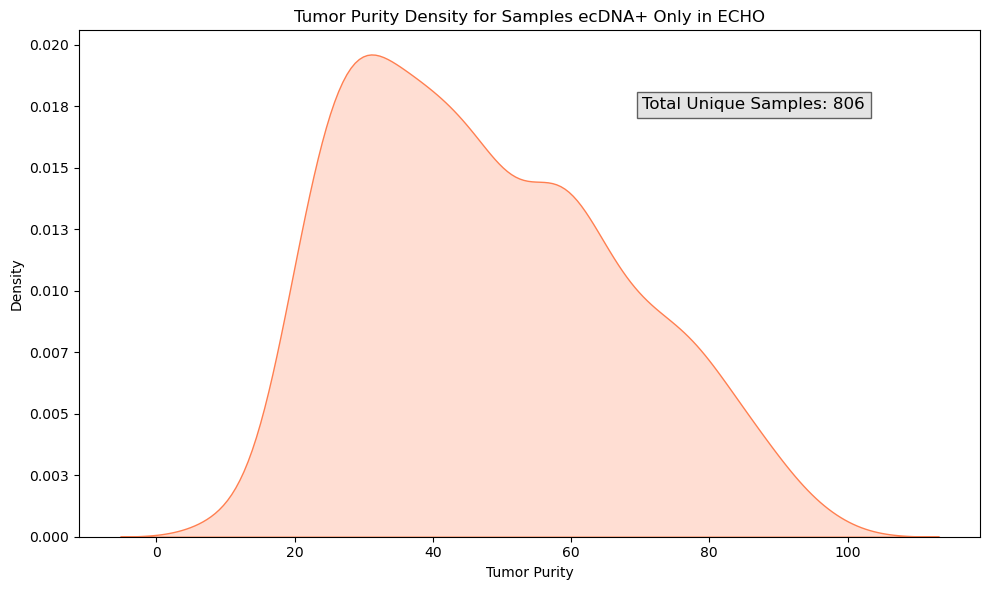

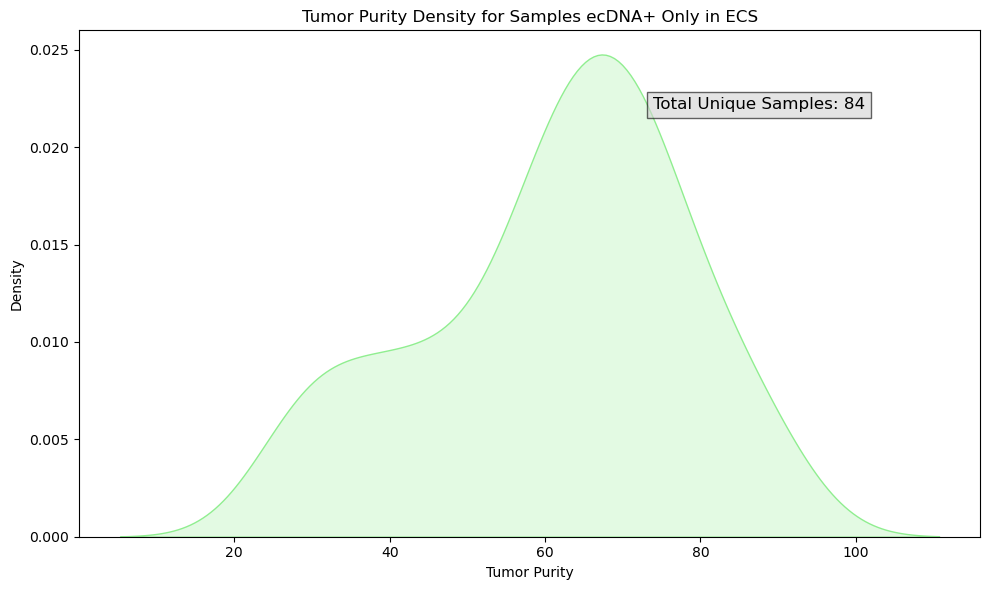

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter

# Define file paths
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
echo_file = os.path.join(directory, "merged.ECHO_results.csv")
ecs_file = os.path.join(directory, "merged_ecDNA_results_filtered_p_ecDNA_filtered_impactGeneList.tsv")
purity_file = os.path.join(directory, "FileA_run.tsv.facets.tsv")  # Updated purity file path

# Load data
old_data = pd.read_csv(echo_file)
new_data = pd.read_csv(ecs_file, sep='\t')
purity_data = pd.read_csv(purity_file, sep='\t', header=None)

# Preprocess old version to remove normal sample ID part
old_data['sample_id'] = old_data['sample_id'].apply(lambda x: "-".join(x.split("-")[:4]))

# Filter for ecDNA+ cases (ecDNA_prob >= 0.5) in ECHO and ECS, ensuring unique sample-gene pairs
old_ecDNA = old_data[(old_data['ecDNA_status'] == "ecDNA") & (old_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])
new_ecDNA = new_data[(new_data['ecDNA_status'] == "ecDNA") & (new_data['ecDNA_prob'] >= 0.5)].drop_duplicates(subset=['sample_id', 'gene'])

# Get unique sample IDs for ecDNA+ cases in ECHO and ECS
old_ecDNA_samples = set(old_ecDNA['sample_id'])
new_ecDNA_samples = set(new_ecDNA['sample_id'])

# Update purity_data column names and rename second column to "Tumor Purity"
purity_data.columns = [f"col_{i}" for i in range(purity_data.shape[1])]
purity_data = purity_data.rename(columns={"col_0": "ID", "col_1": "Tumor Purity"})
# purity_data['Tumor Purity'] = purity_data['Tumor Purity'] / 100

# Define a function to plot KDE for each scenario with formatted y-axis
def plot_kde(purity_data, title, total_samples, color, output_filename):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(purity_data['Tumor Purity'], color=color, fill=True)
    plt.title(title)
    plt.xlabel('Tumor Purity')
    plt.ylabel('Density')

    # Format y-axis to 1 decimal place
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.3f}'))
    
    # Annotation text box for total unique samples
    plt.figtext(0.87, 0.81, f'Total Unique Samples: {total_samples}', ha='right', fontsize=12, bbox=dict(facecolor='lightgrey', alpha=0.6))
    
    # Save plot with specified filename
    output_path = os.path.join(directory, output_filename)
    plt.savefig(output_path, format="png", dpi=300, bbox_inches="tight")
    plt.tight_layout()
    plt.show()

# 1. Concordant Samples (ecDNA+ in both ECHO and ECS)
concordant_samples = old_ecDNA_samples & new_ecDNA_samples
concordant_purity_data = purity_data[purity_data['ID'].isin(concordant_samples)]
concordant_purity_data.loc[:, 'Tumor Purity'] = concordant_purity_data['Tumor Purity'].fillna(0.2)  # Replace missing values with 0.2

# Filter low values
concordant_purity_data = concordant_purity_data[concordant_purity_data['Tumor Purity'] > 0.05]
total_concordant_samples = len(concordant_samples)
plot_kde(concordant_purity_data, 'Tumor Purity Density for Concordant Samples ecDNA+ in Both ECHO and ECS', total_concordant_samples, 'skyblue', "tumor_purity_ecDNA_plus_concordant_samples_density.png")

# 2. Unique ECHO Samples (ecDNA+ only in ECHO)
only_echo_samples = old_ecDNA_samples - new_ecDNA_samples
only_echo_purity_data = purity_data[purity_data['ID'].isin(only_echo_samples)]
only_echo_purity_data.loc[:, 'Tumor Purity'] = only_echo_purity_data['Tumor Purity'].fillna(0.2)  # Replace missing values with 0.2

# Filter low values
only_echo_purity_data = only_echo_purity_data[only_echo_purity_data['Tumor Purity'] > 0.05]
total_only_echo_samples = len(only_echo_samples)
plot_kde(only_echo_purity_data, 'Tumor Purity Density for Samples ecDNA+ Only in ECHO', total_only_echo_samples, 'coral', "tumor_purity_ecDNA_plus_only_echo_density.png")

# 3. Unique ECS Samples (ecDNA+ only in ECS)
only_ecs_samples = new_ecDNA_samples - old_ecDNA_samples
only_ecs_purity_data = purity_data[purity_data['ID'].isin(only_ecs_samples)]
only_ecs_purity_data.loc[:, 'Tumor Purity'] = only_ecs_purity_data['Tumor Purity'].fillna(0.2)  # Replace missing values with 0.2

# Filter low values
only_ecs_purity_data = only_ecs_purity_data[only_ecs_purity_data['Tumor Purity'] > 0.05]
total_only_ecs_samples = len(only_ecs_samples)
plot_kde(only_ecs_purity_data, 'Tumor Purity Density for Samples ecDNA+ Only in ECS', total_only_ecs_samples, 'lightgreen', "tumor_purity_ecDNA_plus_only_ecs_density.png")


In [31]:
import pandas as pd

# Define the directory and file path
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file_path = f"{directory}/facets_cbioportal_merged.tsv"

# Load the data
data = pd.read_csv(file_path, sep='\t')

# Calculate the number of rows with missing values in Facets Purity and Clinical Purity
missing_facets_purity_count = data['Facets Purity'].isna().sum()
missing_clinical_purity_count = data['Clinical Purity'].isna().sum()

# Calculate the number of rows with missing Facets Purity but have values in Clinical Purity
missing_facets_with_clinical_count = data[data['Facets Purity'].isna() & data['Clinical Purity'].notna()].shape[0]

# Calculate the number of rows with missing values in both Facets Purity and Clinical Purity
missing_both_count = data[data['Facets Purity'].isna() & data['Clinical Purity'].isna()].shape[0]

# Display the results
print(f"Missing Facets Purity values: {missing_facets_purity_count}")
print(f"Missing Clinical Purity values: {missing_clinical_purity_count}")
print(f"Missing Facets Purity but with Clinical Purity: {missing_facets_with_clinical_count}")
print(f"Missing both Facets and Clinical Purity: {missing_both_count}")


Missing Facets Purity values: 415
Missing Clinical Purity values: 468
Missing Facets Purity but with Clinical Purity: 113
Missing both Facets and Clinical Purity: 302


In [33]:
import pandas as pd

# Define the directory and file path
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file_path = f"{directory}/FileA_run.tsv.facets.tsv"

# Load the data, assuming no header
data = pd.read_csv(file_path, sep='\t', header=None)

# Check for rows where column 2 has a value of 20
purity_20_count = data[data[1] == 20].shape[0]

# Display the result
print(f"Rows with a purity value of 20: {purity_20_count}")


Rows with a purity value of 20: 151


In [35]:
import pandas as pd

# Define the directory and file path
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file_path = f"{directory}/facets_cbioportal_merged.tsv"

# Load the data
data = pd.read_csv(file_path, sep='\t')

# Check for rows where Facets Purity has a value of 20
facets_purity_20_count = data[data['Facets Purity'] == 0.2].shape[0]

# Check for rows where Clinical Purity has a value of 20
clinical_purity_20_count = data[data['Clinical Purity'] == 20].shape[0]

# Display the results
print(f"Rows with Facets Purity of 20: {facets_purity_20_count}")
print(f"Rows with Clinical Purity of 20: {clinical_purity_20_count}")


Rows with Facets Purity of 20: 56
Rows with Clinical Purity of 20: 0


In [36]:
import pandas as pd

# Define the directory and file path
directory = "/juno/cmo/bergerlab/sumans/Project_ecDNA/Production/penguin/data/projects/ECS_Integration_Tests.7500n/output/validation"
file_path = f"{directory}/facets_cbioportal_merged.tsv"

# Load the data
data = pd.read_csv(file_path, sep='\t')

# Calculate total samples
total_samples = data.shape[0]

# Calculate the number and percentage of rows with missing values in Facets Purity and Clinical Purity
missing_facets_purity_count = data['Facets Purity'].isna().sum()
missing_facets_purity_percentage = (missing_facets_purity_count / total_samples) * 100

missing_clinical_purity_count = data['Clinical Purity'].isna().sum()
missing_clinical_purity_percentage = (missing_clinical_purity_count / total_samples) * 100

# Calculate the number and percentage of rows with missing Facets Purity but have values in Clinical Purity
missing_facets_with_clinical_count = data[data['Facets Purity'].isna() & data['Clinical Purity'].notna()].shape[0]
missing_facets_with_clinical_percentage = (missing_facets_with_clinical_count / total_samples) * 100

# Calculate the number and percentage of rows with missing values in both Facets Purity and Clinical Purity
missing_both_count = data[data['Facets Purity'].isna() & data['Clinical Purity'].isna()].shape[0]
missing_both_percentage = (missing_both_count / total_samples) * 100

# Calculate the number and percentage of rows with Facets Purity data present
facets_present_count = total_samples - missing_facets_purity_count
facets_present_percentage = (facets_present_count / total_samples) * 100

# Display the results
print(f"Total samples: {total_samples}")
print(f"Missing Facets Purity values: {missing_facets_purity_count} ({missing_facets_purity_percentage:.2f}%)")
print(f"Missing Clinical Purity values: {missing_clinical_purity_count} ({missing_clinical_purity_percentage:.2f}%)")
print(f"Missing Facets Purity but with Clinical Purity: {missing_facets_with_clinical_count} ({missing_facets_with_clinical_percentage:.2f}%)")
print(f"Missing both Facets and Clinical Purity: {missing_both_count} ({missing_both_percentage:.2f}%)")
print(f"Samples with Facets Purity data present: {facets_present_count} ({facets_present_percentage:.2f}%)")


Total samples: 7303
Missing Facets Purity values: 415 (5.68%)
Missing Clinical Purity values: 468 (6.41%)
Missing Facets Purity but with Clinical Purity: 113 (1.55%)
Missing both Facets and Clinical Purity: 302 (4.14%)
Samples with Facets Purity data present: 6888 (94.32%)
